##Loading necessary libraries

In [ ]:
from collections import Counter
import nltk
import string
from nltk.tokenize import word_tokenize
import pandas as pd
import math
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("job_descriptions.csv", error_bad_lines=False)


##Loading Data

In [ ]:
# If it's the same job description in the same city, for the same job title, we consider it duplicate.
print(df.shape)
df = df.drop_duplicates(subset=['job_description', 'city', 'job_title'])
print(df.shape)

(4139, 5)
(2681, 5)


In [ ]:
df.head()


job_title                   company  \
0                        Junior Data Scientist              Pacific Life   
1                        Senior Data Scientist                   Invicro   
2                               Data Scientist                  Trillium   
3                               Data Scientist             ENGIE Insight   
4  Analyst II/Assistant Director, Data Science  Liberty Mutual Insurance   

                                         location  \
0                                    - Boston, MA   
1          - Boston, MA 02210 (South Boston area)   
2  - Boston, MA 02108 (Back Bay-Beacon Hill area)   
3                                    - Boston, MA   
4                              - Boston, MA 02101   

                                     job_description    city  
0  Purpose of Role:\nAs part of the PLRe Retro Pr...  boston  
1  Overview:\nThe Senior Data Scientist will be a...  boston  
2  Now hiring a Data Scientist in Boston, Massach...  boston  
3  ENGIE Impact is accelerating sustainability tr...  boston  
4  Liberty Mutual’s newly formed Global Risk Solu...  boston

In [ ]:
df['job_description'][2]

'Now hiring a Data Scientist in Boston, Massachusetts!\nTrillium Technical is seeking a Data Scientist in the Boston, MA area. As a Data Scientist, you will be tasked with using the state’s data to deliver effective and efficient government services and to help us make smarter data-driven public policy decisions, improving the quality of life for residents. Your primary focus will be to apply data mining and processing techniques, conduct statistical analysis, and build high-quality predictive tools to contribute high quality analysis to business and policy projects for agencies across all areas of state government. You will have clear understanding of how your work helps improve the lives of Massachusetts residents, businesses and institutions. At the forefront of big public data analytics and public policy, you’ll find new and interesting challenges every day. Specifically, you will:\nDevelop strategies to solve complex policy and business problems by applying advanced data-driven so

In [ ]:
#finding most common words in the dataset
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from collections import defaultdict
from wordcloud import STOPWORDS
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
# Preprocessing steps
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isnull(text):  # Check for NaN values
        return ''

    # Convert to lowercase
    text = text.lower()

    # Remove special characters and punctuation
    text = re.sub('[^A-Za-z0-9\s]+', '', text)

    # Tokenization and removal of stop words
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


# Create a defaultdict to handle missing values
word_frequencies = defaultdict(int)

# Iterate over the job descriptions and update word frequencies
for description in df['job_description']:
    words = preprocess_text(description)
    words = words.split()
    for word in words:
        if word not in STOPWORDS:  # Exclude stopwords
            word_frequencies[word] += 1

# Convert the defaultdict to a regular dictionary
word_frequency_dict = dict(word_frequencies)

# Sort the word frequency dictionary by frequency in descending order
sorted_word_frequency = sorted(word_frequency_dict.items(), key=lambda x: x[1], reverse=True)

# Get the top 500 most common words
top_words = sorted_word_frequency[:500]

# Extract the word and frequency values
words = [word for word, _ in top_words]
frequencies = [freq for _, freq in top_words]



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
print(top_words)

[('data', 22852), ('experience', 14062), ('team', 10255), ('work', 8207), ('business', 7330), ('learning', 7277), ('science', 6052), ('machine', 5320), ('product', 5014), ('skill', 4932), ('development', 4279), ('analytics', 4254), ('year', 4149), ('model', 4089), ('analysis', 3996), ('opportunity', 3988), ('technology', 3942), ('new', 3708), ('project', 3659), ('solution', 3655), ('research', 3652), ('ability', 3625), ('working', 3499), ('company', 3394), ('help', 3188), ('strong', 3168), ('customer', 3129), ('scientist', 3106), ('system', 3078), ('including', 3047), ('design', 2996), ('engineering', 2923), ('management', 2899), ('client', 2875), ('problem', 2858), ('knowledge', 2858), ('environment', 2819), ('de', 2748), ('service', 2741), ('people', 2712), ('develop', 2658), ('process', 2601), ('technical', 2580), ('tool', 2547), ('build', 2521), ('support', 2475), ('statistical', 2455), ('software', 2446), ('u', 2403), ('role', 2392), ('using', 2373), ('world', 2346), ('application

##Creating keywords or phrases from the dataset descriptions

In [ ]:
# got these keywords by looking at some examples and using existing knowledge.
tool_keywords1 = ['python', 'pytorch', 'sql', 'mxnet', 'mlflow', 'einstein', 'theano', 'pyspark', 'solr', 'mahout',
 'cassandra', 'aws', 'powerpoint', 'spark', 'pig', 'sas', 'java', 'nosql', 'docker', 'salesforce', 'scala', 'r',
 'c', 'c++', 'net', 'tableau', 'pandas', 'scikitlearn', 'sklearn', 'matlab', 'scala', 'keras', 'tensorflow', 'clojure',
 'caffe', 'scipy', 'numpy', 'matplotlib', 'vba', 'spss', 'linux', 'azure', 'cloud', 'gcp', 'mongodb', 'mysql', 'oracle',
 'redshift', 'snowflake', 'kafka', 'javascript', 'qlik', 'jupyter', 'perl', 'bigquery', 'unix', 'react',
 'scikit', 'powerbi', 's3', 'ec2', 'lambda', 'ssrs', 'kubernetes', 'hana', 'spacy', 'tf', 'django', 'sagemaker',
 'seaborn', 'mllib', 'github', 'git', 'elasticsearch', 'splunk', 'airflow', 'looker', 'rapidminer', 'birt', 'pentaho',
 'jquery', 'nodejs', 'd3', 'plotly', 'bokeh', 'xgboost', 'rstudio', 'shiny', 'dash', 'h20', 'h2o', 'hadoop', 'mapreduce',
 'hive', 'cognos', 'angular', 'nltk', 'flask', 'node', 'firebase', 'bigtable', 'rust', 'php', 'cntk', 'lightgbm',
 'kubeflow', 'rpython', 'unixlinux', 'postgressql', 'postgresql', 'postgres', 'hbase', 'dask', 'ruby', 'julia', 'tensor']


# another set of keywords that are longer than one word.
tool_keywords2 = set(['amazon web services', 'google cloud', 'sql server'])


In [ ]:
# hard skills/knowledge required.
skill_keywords1 = set(['statistics', 'cleansing', 'chatbot', 'cleaning', 'blockchain', 'causality', 'correlation', 'bandit', 'anomaly', 'kpi',
 'dashboard', 'geospatial', 'ocr', 'econometrics', 'pca', 'gis', 'svm', 'svd', 'tuning', 'hyperparameter', 'hypothesis',
 'salesforcecom', 'segmentation', 'biostatistics', 'unsupervised', 'supervised', 'exploratory',
 'recommender', 'recommendations', 'research', 'sequencing', 'probability', 'reinforcement', 'graph', 'bioinformatics',
 'chi', 'knn', 'outlier', 'etl', 'normalization', 'classification', 'optimizing', 'prediction', 'forecasting',
 'clustering', 'cluster', 'optimization', 'visualization', 'nlp', 'c#',
 'regression', 'logistic', 'nn', 'cnn', 'glm',
 'rnn', 'lstm', 'gbm', 'boosting', 'recurrent', 'convolutional', 'bayesian',
 'bayes'])


# another set of keywords that are longer than one word.
skill_keywords2 = set(['random forest', 'natural language processing', 'machine learning', 'decision tree', 'deep learning', 'experimental design',
 'time series', 'nearest neighbors', 'neural network', 'support vector machine', 'computer vision', 'machine vision', 'dimensionality reduction',
 'text analytics', 'power bi', 'a/b testing', 'ab testing', 'chat bot', 'data mining'])

In [ ]:
degree_dict = {'bs': 1, 'bachelor': 1, 'undergraduate': 1,
               'master': 2, 'graduate': 2, 'mba': 2.5,
               'phd': 3, 'ph.d': 3, 'ba': 1, 'ma': 2,
               'postdoctoral': 4, 'postdoc': 4, 'doctorate': 3}


degree_dict2 = {'advanced degree': 2, 'ms or': 2, 'ms degree': 2, '4 year degree': 1, 'bs/': 1, 'ba/': 1,
                '4-year degree': 1, 'b.s.': 1, 'm.s.': 2, 'm.s': 2, 'b.s': 1, 'phd/': 3, 'ph.d.': 3, 'ms/': 2,
                'm.s/': 2, 'm.s./': 2, 'msc/': 2, 'master/': 2, 'master\'s/': 2, 'bachelor\s/': 1}
degree_keywords2 = set(degree_dict2.keys())


In [ ]:
#job condition phrases
jb2 = set(["full-time","part-time","contract","temporary","permanent","remote","on-site","flexible","shifts","weekends","overtime","travel",
    "balance","competitive","benefits","insurance","retirement","leave","growth","accomodation",'insurance','healthcare'])


jb1 = set(["full-time position", "part-time schedule","contract-based work","temporary assignment","permanent employment","remote opportunity","on-site requirement",
    "flexible hours","shift work","weekend availability","overtime compensation","travel involvement","work-life balance","competitive salary",
    "comprehensive benefits","health insurance","retirement plan","paid leave","career growth",'annual leaves','bussiness trip','healthcare program',
    'team building','pension plan',])




In [ ]:
df['job_description'].iloc[26]

'Boston, Massachusetts\nThe Data Scientist Role\nYou will support development efforts in the AI domain which includes machine learning (ML), optical character recognition (OCR), and natural language processing (NLP). You will implement the research teams efforts in a diverse set of challenges as we rapidly prototype and build new products. You will interact with product and engineering teams to implement solutions for customer facing software products. We will provide you with any equipment that you need.\nResponsibilities:\nTranslate product ideas into well-posed data science challenges, and solve them\nDesign and deploy Machine Learning (ML) systems using supervised, unsupervised learning, NLP, and NLU\nParticipate in the broader ML community to stay current with the latest techniques and software\nGood knowledge of image processing and computer vision techniques is required\nFlexibility to travel to clients throughout North America\nQualifications:\nCompetencies typically acquired t

In [ ]:
word_tokenize(df['job_description'].iloc[12])

['What',
 'you',
 'will',
 'be',
 'doing',
 'As',
 'a',
 'member',
 'of',
 'the',
 'data',
 'science',
 'team',
 ',',
 'you',
 'will',
 'be',
 'working',
 'alongside',
 'our',
 'technical',
 'experts',
 'and',
 'your',
 'role',
 'will',
 'be',
 'key',
 'to',
 'roll-out',
 'our',
 'different',
 'solutions',
 'to',
 'the',
 'clients',
 '.',
 'Your',
 'day-to-day',
 ':',
 'Set-up',
 'and',
 'deploy',
 'in',
 'production',
 'the',
 'data',
 'processing',
 'pipelines',
 'of',
 'our',
 'clients',
 ',',
 'including',
 'data',
 'reception',
 'in',
 'batches',
 'or',
 'in',
 'real-time',
 ',',
 'data',
 'cleaning',
 ',',
 'information',
 'extraction',
 ',',
 'calibration',
 'of',
 'fraud',
 'detection',
 'models',
 ',',
 'etc',
 '.',
 'R',
 '&',
 'D',
 'for',
 'product',
 'development',
 'and',
 'innovation',
 '(',
 'through',
 'machine',
 'learning',
 ',',
 'image',
 'analysis',
 ',',
 'NLP',
 ',',
 'trend',
 'analysis',
 ',',
 'chatbots…',
 ')',
 'Work',
 'closely',
 'with',
 'our',
 'clients

In [ ]:
from nltk import pos_tag
from nltk.stem import PorterStemmer

pos_tag(tool_keywords1)

[('python', 'NN'),
 ('pytorch', 'NN'),
 ('sql', 'JJ'),
 ('mxnet', 'NN'),
 ('mlflow', 'NN'),
 ('einstein', 'NN'),
 ('theano', 'NN'),
 ('pyspark', 'NN'),
 ('solr', 'NN'),
 ('mahout', 'NN'),
 ('cassandra', 'NN'),
 ('aws', 'VBZ'),
 ('powerpoint', 'JJ'),
 ('spark', 'NN'),
 ('pig', 'NN'),
 ('sas', 'NN'),
 ('java', 'NN'),
 ('nosql', 'JJ'),
 ('docker', 'NN'),
 ('salesforce', 'NN'),
 ('scala', 'NN'),
 ('r', 'NN'),
 ('c', 'VBP'),
 ('c++', 'JJ'),
 ('net', 'JJ'),
 ('tableau', 'NN'),
 ('pandas', 'NN'),
 ('scikitlearn', 'NN'),
 ('sklearn', 'NN'),
 ('matlab', 'NN'),
 ('scala', 'NN'),
 ('keras', 'NNS'),
 ('tensorflow', 'JJ'),
 ('clojure', 'NN'),
 ('caffe', 'NN'),
 ('scipy', 'NN'),
 ('numpy', 'JJ'),
 ('matplotlib', 'NN'),
 ('vba', 'NN'),
 ('spss', 'NN'),
 ('linux', 'JJ'),
 ('azure', 'NN'),
 ('cloud', 'NN'),
 ('gcp', 'NN'),
 ('mongodb', 'NN'),
 ('mysql', 'NN'),
 ('oracle', 'NN'),
 ('redshift', 'NN'),
 ('snowflake', 'VBP'),
 ('kafka', 'NN'),
 ('javascript', 'NN'),
 ('qlik', 'NN'),
 ('jupyter', 'NN'),
 ('

##Final processing of the keywords and the job descriptions

In [ ]:
from nltk import pos_tag
from nltk.stem import PorterStemmer

ps = PorterStemmer()
# process the job description.
def prepare_job_desc(desc):
    # tokenize description.
    tokens = word_tokenize(desc)

    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)

    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = [tok for tok, tag in token_tag if tag in include_tags]

    # stem words.
    stemmed_tokens = [ps.stem(tok).lower() for tok in filtered_tokens]
    return set(stemmed_tokens)

df['job_description_word_set'] = df['job_description'].map(prepare_job_desc)

# process the keywords
tool_keywords1_set = set([ps.stem(tok) for tok in tool_keywords1]) # stem the keywords (since the job description is also stemmed.)
tool_keywords1_dict = {ps.stem(tok):tok for tok in tool_keywords1} # use this dictionary to revert the stemmed words back to the original.

skill_keywords1_set = set([ps.stem(tok) for tok in skill_keywords1])
skill_keywords1_dict = {ps.stem(tok):tok for tok in skill_keywords1}


jb_keywords1_set = set([ps.stem(tok) for tok in jb2])
jb_keywords1_dict = {ps.stem(tok):tok for tok in jb2}

degree_keywords1_set = set([ps.stem(tok) for tok in degree_dict.keys()])
degree_keywords1_dict = {ps.stem(tok):tok for tok in degree_dict.keys()}



In [ ]:
df['job_description_word_set']

0       {strong, life, succe, rate, time, organ, place...
1       {mentor, strong, marit, organ, respons, degre,...
2       {strong, life, big, java, time, unix/linux, et...
3       {marit, strong, life, java, time, organ, dynam...
4       {strong, life, well-b, organ, decision-mak, co...
                              ...                        
4132    {monitor, strong, life, big, novel, time, orga...
4133    {at, strong, amazon.com, passiv, dynam, on-go,...
4134    {sungrown, sampl, ifr, strong, facil, grant, e...
4135    {strong, organ, stemcel, benefit, degre, prese...
4137    {strong, java, someon, date, user, staff, bi, ...
Name: job_description_word_set, Length: 2681, dtype: object

In [ ]:
len(df)

2681

##Creating list of phrases from the keywords for job condtiton, candidate background, skills etc.

In [ ]:
tool_list = []
skill_list = []
degree_list = []
job_list = []

msk = df['city'] != '' # just in case to filter the data.

num_postings = len(df[msk].index)
for i in range(num_postings):
    job_desc = df[msk].iloc[i]['job_description'].lower()
    job_desc_set = df[msk].iloc[i]['job_description_word_set']

    # check if the keywords are in the job description. Look for exact match by token.
    tool_words = tool_keywords1_set.intersection(job_desc_set)
    skill_words = skill_keywords1_set.intersection(job_desc_set)
    degree_words = degree_keywords1_set.intersection(job_desc_set)
    jb_words= jb_keywords1_set.intersection(job_desc_set)

    # check if longer keywords (more than one word) are in the job description. Match by substring.
    j = 0
    for tool_keyword2 in tool_keywords2:
        # tool keywords.
        if tool_keyword2 in job_desc:
            tool_list.append(tool_keyword2)
            j += 1

    k = 0
    for skill_keyword2 in skill_keywords2:
        # skill keywords.
        if skill_keyword2 in job_desc:
            skill_list.append(skill_keyword2)
            k += 1
    l = 0
    for jbs1 in jb1:
        # job condition keywords.
        if jbs1 in job_desc:
            job_list.append(jbs1)
            l += 1

    # search for the minimum education.
    min_education_level = 999
    for degree_word in degree_words:
        level = degree_dict[degree_keywords1_dict[degree_word]]
        min_education_level = min(min_education_level, level)

    for degree_keyword2 in degree_keywords2:
        # longer keywords. Match by substring.
        if degree_keyword2 in job_desc:
            level = degree_dict2[degree_keyword2]
            min_education_level = min(min_education_level, level)

    # label the job descriptions without any tool keywords.
    if len(tool_words) == 0 and j == 0:
        tool_list.append('nothing specified')

    # label the job descriptions without any skill keywords.
    if len(skill_words) == 0 and k == 0:
        skill_list.append('nothing specified')

    # label the job descriptions without any condition keywords.
    if len(jb_words) == 0 and l == 0:
        job_list.append('nothing specified')

    # If none of the keywords were found, but the word degree is present, then assume it's a bachelors level.
    if min_education_level > 500:
        if 'degree' in job_desc:
            min_education_level = 1

    tool_list += list(tool_words)
    skill_list += list(skill_words)
    job_list += list(jb_words)
    degree_list.append(min_education_level)

In [ ]:
len(tool_list),len(skill_list), len(job_list), len(degree_list) #number of phrases

(13922, 14002, 6317, 2681)

##Visualizing the results

In [ ]:
# create the list of tools.
df_job = pd.DataFrame(data={'cnt': job_list})
df_job = df_job.replace(jb_keywords1_dict)



# group some of the categories together.
msk = df_job['cnt'] == 'full-time'
df_job.loc[msk, 'cnt'] = 'full-time position'

msk = df_job['cnt'] == 'leave'
df_job.loc[msk, 'cnt'] = 'paid leave'

msk = df_job['cnt'] == 'competitive'
df_job.loc[msk, 'cnt'] = 'competitive salary'

msk = df_job['cnt'] == 'benefits'
df_job.loc[msk, 'cnt'] = 'comprehensive benefits'

msk = df_job['cnt'] == 'balance'
df_job.loc[msk, 'cnt'] = 'work-life balance'

msk = df_job['cnt'] == 'shifts'
df_job.loc[msk, 'cnt'] = 'shift work'

msk = df_job['cnt'] == 'growth'
df_job.loc[msk, 'cnt'] = 'career growth'

msk = df_job['cnt'] == 'growth'
df_job.loc[msk, 'cnt'] = 'career growth'

msk = df_job['cnt'] == 'healthcare'
df_job.loc[msk, 'cnt'] = 'healthcare insaurance'

msk = df_job['cnt'] == 'insaurance'
df_job.loc[msk, 'cnt'] = 'healthcare insaurance'

df_job_top50 = df_job['cnt'].value_counts().reset_index().rename(columns={'index': 'job'}).iloc[:50]

In [ ]:
# visualize the tools.
layout = dict(
    title='Job condition For Data Scientists',
    yaxis=dict(
        title='% of job postings',
        tickformat=',.0%',
    )
)

fig = go.Figure(layout=layout)
fig.add_trace(go.Bar(
    x=df_job_top50['job'],
    y=df_job_top50['cnt']/num_postings
))

iplot(fig)

In [ ]:
# create the list of tools.
df_tool = pd.DataFrame(data={'cnt': tool_list})
df_tool = df_tool.replace(tool_keywords1_dict)

# group some of the categories together.
msk = df_tool['cnt'] == 'h20'
df_tool.loc[msk, 'cnt'] = 'h2o'

msk = df_tool['cnt'] == 'aws'
df_tool.loc[msk, 'cnt'] = 'amazon web services'

msk = df_tool['cnt'] == 'gcp'
df_tool.loc[msk, 'cnt'] = 'google cloud'

msk = df_tool['cnt'] == 'github'
df_tool.loc[msk, 'cnt'] = 'git'

msk = df_tool['cnt'] == 'postgressql'
df_tool.loc[msk, 'cnt'] = 'postgres'

msk = df_tool['cnt'] == 'tensor'
df_tool.loc[msk, 'cnt'] = 'tensorflow'

df_tool_top50 = df_tool['cnt'].value_counts().reset_index().rename(columns={'index': 'tool'}).iloc[:50]

In [ ]:
df_tool['cnt'].value_counts()

python         1651
sql            1077
r              1035
spark           559
cloud           530
               ... 
lightgbm          3
rstudio           3
rapidminer        2
scikitlearn       2
firebase          1
Name: cnt, Length: 110, dtype: int64

In [ ]:
# visualize the tools.
layout = dict(
    title='Tools For Data Scientists',
    yaxis=dict(
        title='% of job postings',
        tickformat=',.0%',
    )
)

fig = go.Figure(layout=layout)
fig.add_trace(go.Bar(
    x=df_tool_top50['tool'],
    y=df_tool_top50['cnt']/num_postings
))

iplot(fig)

In [ ]:
# create the list of skills/knowledge.
df_skills = pd.DataFrame(data={'cnt': skill_list})
df_skills = df_skills.replace(skill_keywords1_dict)

# group some of the categories together.
msk = df_skills['cnt'] == 'nlp'
df_skills.loc[msk, 'cnt'] = 'natural language processing'

msk = df_skills['cnt'] == 'convolutional'
df_skills.loc[msk, 'cnt'] = 'convolutional neural network'

msk = df_skills['cnt'] == 'cnn'
df_skills.loc[msk, 'cnt'] = 'convolutional neural network'

msk = df_skills['cnt'] == 'recurrent'
df_skills.loc[msk, 'cnt'] = 'recurrent neural network'

msk = df_skills['cnt'] == 'rnn'
df_skills.loc[msk, 'cnt'] = 'recurrent neural network'

msk = df_skills['cnt'] == 'knn'
df_skills.loc[msk, 'cnt'] = 'nearest neighbors'

msk = df_skills['cnt'] == 'svm'
df_skills.loc[msk, 'cnt'] = 'support vector machine'

msk = df_skills['cnt'] == 'machine vision'
df_skills.loc[msk, 'cnt'] = 'computer vision'

msk = df_skills['cnt'] == 'ab testing'
df_skills.loc[msk, 'cnt'] = 'a/b testing'

df_skills_top50 = df_skills['cnt'].value_counts().reset_index().rename(columns={'index': 'skill'}).iloc[:50]

In [ ]:
# visualize the skills.
layout = dict(
    title='Skills For Data Scientists',
    yaxis=dict(
        title='% of job postings',
        tickformat=',.0%',
    )
)

fig = go.Figure(layout=layout)
fig.add_trace(go.Bar(
    x=df_skills_top50['skill'],
    y=df_skills_top50['cnt']/num_postings
))

iplot(fig)

In [ ]:
# create the list of degree.
df_degrees = pd.DataFrame(data={'cnt': degree_list})
df_degrees['degree_type'] = ''


msk = df_degrees['cnt'] == 1
df_degrees.loc[msk, 'degree_type'] = 'bachelors'

msk = df_degrees['cnt'] == 2
df_degrees.loc[msk, 'degree_type'] = 'masters'

msk = df_degrees['cnt'] == 3
df_degrees.loc[msk, 'degree_type'] = 'phd'

msk = df_degrees['cnt'] == 4
df_degrees.loc[msk, 'degree_type'] = 'postdoc'

msk = df_degrees['cnt'] == 2.5
df_degrees.loc[msk, 'degree_type'] = 'mba'

msk = df_degrees['cnt'] > 500
df_degrees.loc[msk, 'degree_type'] = 'not specified'


df_degree_cnt = df_degrees['degree_type'].value_counts().reset_index().rename(columns={'index': 'degree'}).iloc[:50]

In [ ]:
# visualize the degrees.
layout = dict(
    title='Minimum Education For Data Scientists',
    yaxis=dict(
        title='% of job postings',
        tickformat=',.0%',
    )
)

fig = go.Figure(layout=layout)
fig.add_trace(go.Bar(
    x=df_degree_cnt['degree'],
    y=df_degree_cnt['degree_type']/num_postings
))

iplot(fig)

In [ ]:
df_degree_cnt

degree  degree_type
0      bachelors         1319
1        masters          734
2  not specified          392
3            phd          234
4        postdoc            1
5            mba            1

##Computing Relevance matrices

In [ ]:
import re

import numpy as np
from gensim import corpora, models, similarities

def clear_text(text, lowerize=True):

    pat = re.compile(r'[^A-Za-z0-9 \-\n\r.,;!?А-Яа-я]+')
    cleared_text = re.sub(pat, ' ', text)

    if lowerize:
        cleared_text = cleared_text.lower()

    tokens = cleared_text.split()
    return tokens


def make_substrings(tokens, k=4):

    for i in range(max(len(tokens) - k + 1, 1)):
        yield ' '.join(tokens[i:i + k])

def get_corelevance_matrix(texts):
    prepared_text_tokens = [clear_text(t) for t in texts]
    dictionary = corpora.Dictionary(prepared_text_tokens)
    corpus = [dictionary.doc2bow(text) for text in prepared_text_tokens]
    tfidf = models.TfidfModel(corpus)
    index = similarities.MatrixSimilarity(tfidf[corpus])
    return np.array(index)

def get_relevance_matrix(texts, strings):
    prepared_text_tokens = [clear_text(t) for t in texts]
    prepared_string_tokens = [clear_text(s) for s in strings]
    dictionary = corpora.Dictionary(prepared_text_tokens + prepared_string_tokens)
    corpus = [dictionary.doc2bow(text) for text in prepared_text_tokens]
    query_corpus = [dictionary.doc2bow(text) for text in prepared_string_tokens]
    tfidf = models.TfidfModel(corpus)
    index = similarities.MatrixSimilarity(tfidf[corpus])
    return np.array([index[tfidf[query]] for query in query_corpus])

def save_matrix(matrix):
    np.savetxt("filename", matrix)


if __name__ == "__main__":

    # Corelevance matrix:
    texts = ["Lorem ipsum dolor sit amet, consectetur adipiscing elit,",
             "qui dolorem ipsum, quia dolor sit, amet!",
             "lorem ipsum"]

    corelevance_matrix = get_corelevance_matrix(texts)
    print("Corelevance mairix:")
    print(corelevance_matrix)

    # Saving
    save_matrix(corelevance_matrix)

    # Relevance between the texts and strings:
    strings = ["Loramet, ipsum",
               "sit dolor amet r 6565?",
               "il lorem",
               "ip sum3"]

    relevance_matrix = get_relevance_matrix(texts, strings)
    print("Relevance mairix:")
    print(relevance_matrix)


Corelevance mairix:
[[1.0000001  0.02364416 0.22442956]
 [0.02364416 1.         0.        ]
 [0.22442956 0.         0.99999994]]
Relevance mairix:
[[0.15869567 0.         0.70710677]
 [0.45833802 0.05158673 0.        ]
 [0.15869567 0.         0.70710677]
 [0.         0.         0.        ]]


In [ ]:
df_skills

cnt
0             dashboard
1              research
2            prediction
3         deep learning
4      machine learning
...                 ...
13997       data mining
13998  machine learning
13999     visualization
14000               etl
14001        prediction

[14002 rows x 1 columns]

In [ ]:
relevance_matrix.shape

(4, 3)

In [ ]:
len(df_skills),len(df_degrees),len(df_job)

(14002, 2681, 6317)

In [ ]:
#extracting 100 phrases for job_conditions, job_responsibilities (we will consider the skills are job resp) and candidate background
import random
random.seed(42)
job_conditions = random.sample([x for x in df_skills['cnt'] if x != "not specified"], 100)
job_resp = random.sample([x for x in df_degrees['degree_type'] if x != "not specified"], 100)
cand_background = random.sample([x for x in df_job['cnt'] if x != "not specified"], 100)

In [ ]:
job_conditions,job_resp, cand_background

(['a/b testing',
  'etl',
  'statistics',
  'machine learning',
  'statistics',
  'prediction',
  'cleaning',
  'sequencing',
  'statistics',
  'regression',
  'cleaning',
  'time series',
  'cluster',
  'research',
  'machine learning',
  'cleansing',
  'supervised',
  'segmentation',
  'research',
  'optimization',
  'machine learning',
  'recommender',
  'regression',
  'normalization',
  'research',
  'statistics',
  'regression',
  'optimization',
  'decision tree',
  'segmentation',
  'gbm',
  'research',
  'cluster',
  'a/b testing',
  'gis',
  'machine learning',
  'natural language processing',
  'machine learning',
  'etl',
  'experimental design',
  'a/b testing',
  'etl',
  'kpi',
  'prediction',
  'prediction',
  'statistics',
  'data mining',
  'statistics',
  'neural network',
  'research',
  'machine learning',
  'visualization',
  'research',
  'machine learning',
  'geospatial',
  'natural language processing',
  'forecasting',
  'visualization',
  'machine learning',

In [ ]:
type(job_conditions) #we have extracted these phrases and saved as lists

list

In [ ]:
df['job_description']

0       Purpose of Role:\nAs part of the PLRe Retro Pr...
1       Overview:\nThe Senior Data Scientist will be a...
2       Now hiring a Data Scientist in Boston, Massach...
3       ENGIE Impact is accelerating sustainability tr...
4       Liberty Mutual’s newly formed Global Risk Solu...
                              ...                        
4132    Job Description Summary\nThe Human Resources C...
4133    Bachelor’s degree\nYou have 3+ years of corpor...
4134    The Company\nTantalus Labs is committed to Sun...
4135    Job Description Summary\nThe Human Resources G...
4137    Data Scientist\n\nContract- 9 months with exte...
Name: job_description, Length: 2681, dtype: object

In [ ]:
job_desc = df['job_description'].tolist()
job_desc[:1]

["Purpose of Role:\nAs part of the PLRe Retro Pricing Team, you will be responsible for determining North American longevity and mortality basis assumptions used in the pricing of mortality and longevity business in the US and Canada. You will work closely with the pricing, risk management, research and development and valuation teams to ensure accuracy in our modelling of new and inforce business. In addition, you will work closely with teams in London and Toronto to ensure consistent process and facilitate the sharing of ideas and information across teams.\n\nTarget level is for an entry level Data Scientist. Candidates who meet most but not all of the requirements are encouraged to apply. Actual job offer and title will be based on level of experience and skillset.\n\nMain Duties\n\nSupport in the development of decrement models for assumption setting Work on finding efficiencies through automation and use of new tools Build and maintain experience dashboards Help drive and define t

In [ ]:
#computing the relevance matrices i,j,k times job adverts

job_conds = get_relevance_matrix(job_desc, job_conditions)
job_respsn = get_relevance_matrix(job_desc, job_resp)
cand_bd = get_relevance_matrix(job_desc, cand_background)


In [ ]:
job_conds

array([[1.1755213e-05, 6.5562017e-02, 9.0555413e-06, ..., 7.9626534e-06,
        8.2524230e-06, 2.2037818e-06],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 5.1540256e-02],
       [0.0000000e+00, 3.3144947e-02, 2.8433310e-02, ..., 1.3236231e-02,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 4.0381026e-02, 1.9592449e-02, ..., 0.0000000e+00,
        0.0000000e+00, 1.6479896e-02]], dtype=float32)

In [ ]:
#job_cond,job_resps,  cand_bg =  np.transpose(job_conds, (1, 0)),np.transpose(job_respsn, (1, 0)),np.transpose(cand_bd, (1, 0))
job_cond, job_resps, cand_bg = job_conds, job_respsn, cand_bd #verifying all the matrices have same dimensions

In [ ]:
job_conditions

['a/b testing',
 'etl',
 'statistics',
 'machine learning',
 'statistics',
 'prediction',
 'cleaning',
 'sequencing',
 'statistics',
 'regression',
 'cleaning',
 'time series',
 'cluster',
 'research',
 'machine learning',
 'cleansing',
 'supervised',
 'segmentation',
 'research',
 'optimization',
 'machine learning',
 'recommender',
 'regression',
 'normalization',
 'research',
 'statistics',
 'regression',
 'optimization',
 'decision tree',
 'segmentation',
 'gbm',
 'research',
 'cluster',
 'a/b testing',
 'gis',
 'machine learning',
 'natural language processing',
 'machine learning',
 'etl',
 'experimental design',
 'a/b testing',
 'etl',
 'kpi',
 'prediction',
 'prediction',
 'statistics',
 'data mining',
 'statistics',
 'neural network',
 'research',
 'machine learning',
 'visualization',
 'research',
 'machine learning',
 'geospatial',
 'natural language processing',
 'forecasting',
 'visualization',
 'machine learning',
 'etl',
 'machine learning',
 'research',
 'convolutional 

##Aggregating the matrices

In [ ]:
#aggregating the three matrices into one 3-way supermatrix
import numpy as np

# Assuming job_cond, job_resps, and cand_bg are NumPy arrays with the same shape

# Stack the matrices along a new axis (e.g., axis=2)
W = np.stack((job_cond, job_resps, cand_bg), axis=2)

print(W.shape)


(100, 2681, 3)


In [ ]:
#W = np.transpose(W, (1, 0, 2))

W.shape

(100, 2681, 3)

In [ ]:
W

array([[[1.1755213e-05, 0.0000000e+00, 1.3751779e-03],
        [6.5562017e-02, 0.0000000e+00, 0.0000000e+00],
        [9.0555413e-06, 0.0000000e+00, 8.8279851e-04],
        ...,
        [7.9626534e-06, 0.0000000e+00, 7.8657102e-03],
        [8.2524230e-06, 0.0000000e+00, 4.5253395e-04],
        [2.2037818e-06, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 7.2518252e-02],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [5.1540256e-02, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 7.8675551e-03],
        [3.3144947e-02, 0.0000000e+00, 0.0000000e+00],
        [2.8433310e-02, 0.0000000e+00, 0.0000000e+00],
        ...,
        [1.3236231e-02, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 5.1780003e-03],
        [0.0000000e+00

In [ ]:
import numpy as np

# Find the maximum and minimum values in W
max_value = np.amax(W)
min_value = np.amin(W)

print("Maximum value:", max_value)
print("Minimum value:", min_value)


Maximum value: 0.3886253
Minimum value: 0.0


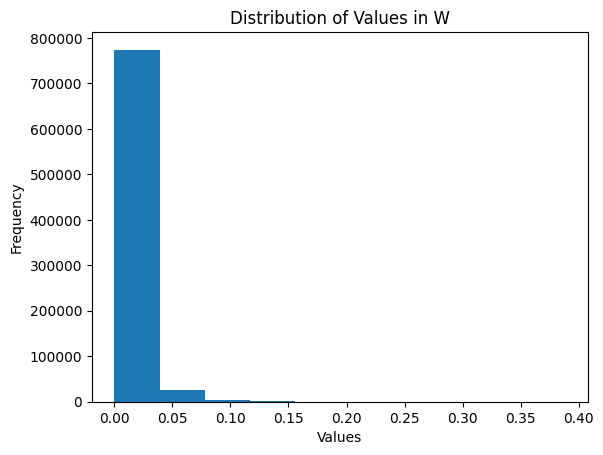

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten the tensor to create a 1D array
values = W.flatten()

# Plot the histogram
plt.hist(values, bins=10)  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Values in W')
plt.show()


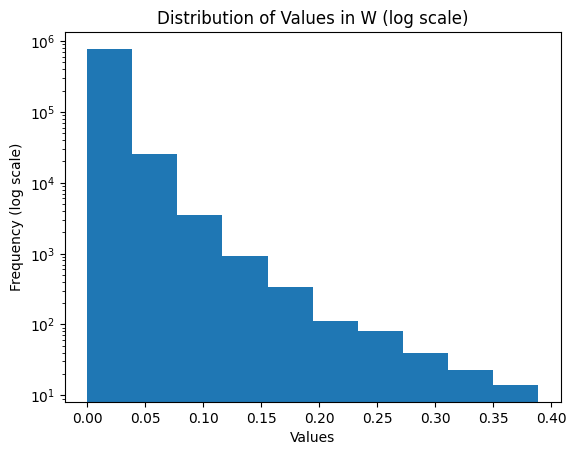

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten the tensor to create a 1D array
values = W.flatten()

# Plot the histogram with a logarithmic scale
plt.hist(values, bins=10, log=True)  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Values in W (log scale)')
plt.show()


In [ ]:
np.count_nonzero(W)

150913

In [ ]:
import numpy as np

# Filter the tensor within the desired range
filtered_W = np.logical_and(W > 0, W <= 0.05)

# Count the non-zero numbers in the filtered tensor
non_zero_count = np.count_nonzero(filtered_W)

# Print the total number of non-zero numbers within the range
print("Total number of non-zero numbers in the range [0, 0.05]:", non_zero_count)


Total number of non-zero numbers in the range [0, 0.05]: 133496


##Converting the dataset into binary data

In [ ]:
import numpy as np

# Define the threshold value
threshold = 0.05  # Adjust this threshold based on your data

# Convert W to binary format
binary_W = np.where(W > threshold, 1, 0)

type(binary_W)


numpy.ndarray

In [ ]:
binary_W.shape

(100, 2681, 3)

##Applying triclustering algorithm

In [ ]:
import cupy as cp
from tqdm import tqdm

def tricluster_box(data, i, n_iterations=20,top_n=3):
    I, J, K = data.shape
    V = {i}
    W = {j for j in range(J) if data[i, j, :].any()}
    U = {k for k in range(K) if data[i, :, k].any()}

    triclusters = []
    best_tricluster = (V, W,)
    best_D = 0

    for iteration in tqdm(range(n_iterations), desc="Iterations"):
        V, W, U = update_cluster(data, V, W, U, 'i')
        V, W, U = update_cluster(data, V, W, U, 'j')
        V, W, U = update_cluster(data, V, W, U, 'k')

        D = calculate_D_total(data, V, W, U)
        if not cp.isnan(D):  # Exclude triclusters with NaN D value
            triclusters.append((V.copy(), W.copy(), U.copy(), D))

        if D > best_D:
            best_D = D
            best_tricluster = (V.copy(), W.copy(), U.copy())

        print(f"Iteration {iteration + 1}: V={V}, W={W}, U={U}, D={D}")
    # Sort triclusters by D value in descending order
    sorted_triclusters = sorted(triclusters, key=lambda x: x[3], reverse=True)

    # Return the top_n triclusters
    return sorted_triclusters[:top_n]

    #return best_tricluster

def calculate_D_total(data, V, W, U):
    r_prime = data[cp.ix_(list(V), list(W), list(U))].sum()
    n, m ,l = len(V), len(W), len(U)
    D = r_prime ** 2 / (n * m * l)
    return D

def update_cluster(data, V, W, U, dim):
    I, J, K = data.shape
    D_max = 0
    idx_max, action = None, None

    if dim == 'i':
        indices = range(I)
        cluster = V  # Update the cluster based on the dimension
    elif dim == 'j':
        indices = range(J)
        cluster = W
    else:
        indices = range(K)
        cluster = U

    for idx in indices:
        if idx in cluster:
            cluster.remove(idx)
            z = -1
        else:
            cluster.add(idx)
            z = 1

        D = calculate_D(data, V, W, U, idx, z, dim)
        if D > D_max:
            D_max = D
            idx_max, action = idx, 'add' if z == 1 else 'remove'

        cluster.symmetric_difference_update({idx})

    if D_max > 0:
        if action == 'add':
            cluster.add(idx_max)
        else:
            cluster.remove(idx_max)

    return V, W, U


def calculate_D(data, V, W, U, idx, z, dim):
    r_prime = data[cp.ix_(list(V), list(W), list(U))].sum()
    if dim == 'i':
        r_prime_i = data[cp.ix_([idx], list(W), list(U))].sum()  # Modified indexing here
    elif dim == 'j':
        r_prime_i = data[cp.ix_(list(V), [idx], list(U))].sum()
    else:
        r_prime_i = data[cp.ix_(list(V), list(W), [idx])].sum()

    n, m, l = len(V), len(W), len(U)
    D = (r_prime_i ** 2 + 2 * z * r_prime_i * r_prime - z * r_prime ** 2 / (n)) / ((n+z) * m * l)
    return D


i = 0
#data = cp.random.randint(0, 2, size=(100, 40,40))
data = cp.asarray(binary_W)
top_triclusters = tricluster_box(data, i, n_iterations=10, top_n=10)

# Print the top triclusters
for idx, tricluster in enumerate(top_triclusters):
    V, Wi, U, D = tricluster
    print(f"\nTricluster {idx + 1}:")
    print(f"V: {V}")
    print(f"W: {Wi}")
    print(f"U: {U}")
    print(f"D: {D}")



Iterations:  10%|█         | 1/10 [00:02<00:25,  2.78s/it]

Iteration 1: V={0, 33}, W={1, 2071, 2073, 26, 28, 31, 33, 2083, 49, 54, 2102, 57, 2107, 2121, 82, 97, 2147, 117, 1142, 1143, 120, 132, 141, 1165, 1176, 160, 172, 1196, 2223, 181, 2236, 1217, 194, 2247, 2258, 1246, 1254, 1258, 237, 1268, 2294, 2316, 1293, 271, 1296, 280, 1304, 2328, 298, 302, 318, 2368, 1352, 2385, 1371, 1376, 1385, 1407, 2435, 1418, 1420, 399, 407, 2456, 410, 1434, 448, 451, 2501, 457, 1498, 2528, 2529, 2532, 1518, 1521, 1522, 2548, 2549, 518, 522, 2587, 1571, 1575, 559, 2611, 1605, 2632, 2639, 2652, 614, 616, 618, 2675, 669, 678, 679, 686, 1725, 1731, 1737, 716, 730, 752, 1778, 1788, 1810, 787, 1813, 1814, 789, 793, 796, 803, 810, 812, 814, 818, 1878, 857, 859, 1889, 888, 890, 897, 905, 1929, 992, 2041}, U={0, 1}, D=60.031007751937985


Iterations:  20%|██        | 2/10 [00:05<00:23,  2.94s/it]

Iteration 2: V={0, 33, 40}, W={1, 2071, 2073, 26, 28, 31, 2083, 49, 54, 2102, 57, 2107, 2121, 82, 97, 2147, 117, 1142, 1143, 120, 132, 141, 1165, 1176, 160, 172, 1196, 2223, 181, 2236, 1217, 194, 2247, 2258, 1246, 1254, 1258, 237, 1268, 2294, 2316, 1293, 271, 1296, 280, 1304, 2328, 298, 302, 318, 2368, 1352, 2385, 1371, 1376, 1385, 1407, 2435, 1418, 1420, 399, 407, 2456, 410, 1434, 448, 451, 2501, 457, 1498, 2528, 2529, 2532, 1518, 1521, 1522, 2548, 2549, 518, 522, 2587, 1571, 1575, 559, 2611, 1605, 2632, 2639, 2652, 614, 616, 618, 2675, 669, 678, 679, 686, 1725, 1731, 1737, 716, 730, 752, 1778, 1788, 1810, 787, 1813, 1814, 789, 793, 796, 803, 810, 812, 814, 818, 1878, 857, 859, 1889, 888, 890, 897, 905, 1929, 992, 2041}, U={0, 1}, D=90.75


Iterations:  30%|███       | 3/10 [00:08<00:20,  2.94s/it]

Iteration 3: V={0, 33, 3, 40}, W={1, 2071, 2073, 26, 28, 31, 2083, 49, 54, 2102, 57, 2107, 2121, 82, 97, 2147, 117, 1142, 1143, 120, 141, 1165, 1176, 160, 172, 1196, 2223, 181, 2236, 1217, 194, 2247, 2258, 1246, 1254, 1258, 237, 1268, 2294, 2316, 1293, 271, 1296, 280, 1304, 2328, 298, 302, 318, 2368, 1352, 2385, 1371, 1376, 1385, 1407, 2435, 1418, 1420, 399, 407, 2456, 410, 1434, 448, 451, 2501, 457, 1498, 2528, 2529, 2532, 1518, 1521, 1522, 2548, 2549, 518, 522, 2587, 1571, 1575, 559, 2611, 1605, 2632, 2639, 2652, 614, 616, 618, 2675, 669, 678, 679, 686, 1725, 1731, 1737, 716, 730, 752, 1778, 1788, 1810, 787, 1813, 1814, 789, 793, 796, 803, 810, 812, 814, 818, 1878, 857, 859, 1889, 888, 890, 897, 905, 1929, 992, 2041}, U={0, 1, 2}, D=88.86089238845145


Iterations:  40%|████      | 4/10 [00:11<00:16,  2.83s/it]

Iteration 4: V={0, 33, 3, 67, 40}, W={1, 2071, 2073, 26, 28, 31, 2083, 49, 54, 2102, 57, 2107, 2121, 82, 97, 2147, 117, 1142, 1143, 120, 141, 1165, 1176, 160, 172, 1196, 2223, 181, 2236, 1217, 194, 2247, 2258, 1246, 1254, 1258, 1268, 2294, 2316, 1293, 271, 1296, 280, 1304, 2328, 298, 302, 318, 2368, 1352, 2385, 1371, 1376, 1385, 1407, 2435, 1418, 1420, 399, 407, 2456, 410, 1434, 448, 451, 2501, 457, 1498, 2528, 2529, 2532, 1518, 1521, 1522, 2548, 2549, 518, 522, 2587, 1571, 1575, 559, 2611, 1605, 2632, 2639, 2652, 614, 616, 618, 2675, 669, 678, 679, 686, 1725, 1731, 1737, 716, 730, 752, 1778, 1788, 1810, 787, 1813, 1814, 789, 793, 796, 803, 810, 812, 814, 818, 1878, 857, 859, 1889, 888, 890, 897, 905, 1929, 992, 2041}, U={0, 1, 2}, D=98.74285714285715


Iterations:  50%|█████     | 5/10 [00:14<00:13,  2.76s/it]

Iteration 5: V={0, 33, 67, 3, 40, 58}, W={1, 518, 522, 2071, 2073, 26, 28, 2587, 31, 2083, 1571, 1575, 559, 49, 2611, 54, 2102, 57, 2107, 1605, 2632, 2121, 2639, 82, 2652, 97, 2147, 614, 616, 618, 2675, 117, 1142, 1143, 120, 141, 1165, 1176, 669, 160, 678, 679, 172, 1196, 686, 2223, 181, 2236, 1725, 1217, 194, 1731, 2247, 1737, 716, 2258, 730, 1246, 1254, 1258, 752, 1778, 1268, 2294, 1788, 2316, 1293, 1296, 1810, 787, 1813, 1814, 789, 280, 793, 1304, 2328, 796, 803, 298, 810, 812, 302, 814, 818, 318, 2368, 1352, 2385, 1878, 857, 1371, 859, 1376, 1889, 1385, 888, 890, 1407, 897, 2435, 905, 1929, 1418, 1420, 399, 407, 2456, 410, 1434, 448, 451, 2501, 457, 1498, 2528, 2529, 992, 2532, 1518, 1521, 1522, 2548, 2549, 2041}, U={0, 1, 2}, D=108.02177777777777


Iterations:  60%|██████    | 6/10 [00:16<00:10,  2.72s/it]

Iteration 6: V={0, 33, 67, 3, 40, 58, 60}, W={1, 518, 522, 2071, 2073, 26, 28, 2587, 31, 2083, 1571, 1575, 49, 2611, 2102, 54, 57, 2107, 1605, 2632, 2121, 2639, 82, 2652, 97, 2147, 614, 616, 618, 2675, 117, 1142, 1143, 120, 141, 1165, 1176, 669, 160, 678, 679, 172, 1196, 686, 2223, 181, 2236, 1725, 1217, 194, 1731, 2247, 1737, 716, 2258, 730, 1246, 1254, 1258, 752, 1778, 1268, 2294, 1788, 2316, 1293, 1296, 1810, 787, 1813, 1814, 789, 280, 793, 1304, 2328, 796, 803, 298, 810, 812, 302, 814, 818, 318, 2368, 1352, 2385, 1878, 857, 1371, 859, 1376, 1889, 1385, 888, 890, 1407, 897, 2435, 905, 1929, 1418, 1420, 399, 407, 2456, 410, 1434, 448, 451, 2501, 457, 1498, 2528, 2529, 992, 2532, 1518, 1521, 1522, 2548, 2549, 2041}, U={0, 1, 2}, D=117.86328725038402


Iterations:  70%|███████   | 7/10 [00:20<00:08,  2.91s/it]

Iteration 7: V={0, 67, 3, 14, 33, 40, 58, 60}, W={1, 518, 522, 2071, 2073, 26, 2587, 28, 31, 2083, 1571, 1575, 49, 2611, 2102, 54, 57, 2107, 1605, 2632, 2121, 2639, 82, 2652, 97, 2147, 614, 618, 2675, 117, 1142, 1143, 120, 141, 1165, 1176, 669, 160, 678, 679, 172, 1196, 686, 2223, 181, 2236, 1725, 1217, 194, 1731, 2247, 1737, 716, 2258, 730, 1246, 1254, 1258, 752, 1778, 1268, 2294, 1788, 2316, 1293, 1296, 1810, 787, 1813, 1814, 789, 280, 793, 1304, 2328, 796, 803, 298, 810, 812, 302, 814, 818, 318, 2368, 1352, 2385, 1878, 857, 1371, 859, 1376, 1889, 1385, 888, 890, 1407, 897, 2435, 905, 1929, 1418, 1420, 399, 407, 2456, 410, 1434, 448, 451, 2501, 457, 1498, 2528, 2529, 992, 2532, 1518, 1521, 1522, 2548, 2549, 2041}, U={0, 1, 2}, D=127.70867208672087


Iterations:  80%|████████  | 8/10 [00:22<00:05,  2.84s/it]

Iteration 8: V={0, 67, 3, 14, 33, 37, 40, 58, 60}, W={1, 518, 522, 2071, 2073, 26, 2587, 28, 31, 2083, 1571, 1575, 49, 2611, 2102, 54, 57, 2107, 1605, 2632, 2121, 2639, 82, 2652, 97, 2147, 614, 618, 2675, 117, 1142, 1143, 120, 141, 1165, 1176, 669, 160, 678, 679, 172, 1196, 686, 2223, 181, 2236, 1725, 1217, 194, 1731, 2247, 1737, 716, 2258, 730, 1246, 1254, 1258, 752, 1778, 1268, 2294, 1788, 2316, 1293, 1296, 1810, 1813, 1814, 789, 280, 793, 1304, 2328, 796, 803, 298, 810, 812, 302, 814, 818, 318, 2368, 1352, 2385, 1878, 857, 1371, 859, 1376, 1889, 1385, 888, 890, 1407, 897, 2435, 905, 1929, 1418, 1420, 399, 407, 2456, 410, 1434, 448, 451, 2501, 457, 1498, 2528, 2529, 992, 2532, 1518, 1521, 1522, 2548, 2549, 2041}, U={0, 1, 2}, D=137.91013964784457


Iterations:  90%|█████████ | 9/10 [00:25<00:02,  2.79s/it]

Iteration 9: V={0, 67, 3, 14, 33, 37, 40, 53, 58, 60}, W={1, 518, 522, 2071, 2073, 26, 2587, 28, 31, 2083, 1571, 1575, 49, 2611, 2102, 54, 57, 2107, 1605, 2632, 2121, 2639, 82, 2652, 97, 2147, 614, 618, 2675, 117, 1142, 1143, 120, 141, 1165, 1176, 669, 160, 678, 679, 172, 1196, 686, 2223, 181, 2236, 1725, 1217, 194, 1731, 2247, 1737, 716, 2258, 730, 1246, 1254, 1258, 752, 1778, 1268, 2294, 1788, 2316, 1293, 1296, 1810, 1813, 1814, 789, 280, 793, 1304, 2328, 796, 298, 810, 812, 302, 814, 818, 318, 2368, 1352, 2385, 1878, 857, 1371, 859, 1376, 1889, 1385, 888, 890, 1407, 897, 2435, 905, 1929, 1418, 1420, 399, 407, 2456, 410, 1434, 448, 451, 2501, 457, 1498, 2528, 2529, 992, 2532, 1518, 1521, 1522, 2548, 2549, 2041}, U={0, 1, 2}, D=148.4176308539945


Iterations: 100%|██████████| 10/10 [00:28<00:00,  2.81s/it]

Iteration 10: V={0, 67, 3, 74, 14, 33, 37, 40, 53, 58, 60}, W={1, 518, 522, 2071, 2073, 26, 2587, 28, 31, 2083, 1571, 1575, 49, 2611, 2102, 54, 57, 2107, 1605, 2632, 2121, 2639, 82, 2652, 97, 2147, 614, 618, 2675, 117, 1142, 1143, 120, 141, 1165, 1176, 669, 160, 678, 679, 172, 1196, 686, 2223, 181, 2236, 1725, 1217, 194, 1731, 2247, 1737, 716, 2258, 730, 1246, 1254, 1258, 752, 1778, 1268, 2294, 1788, 2316, 1293, 1296, 1810, 1813, 1814, 789, 280, 793, 1304, 2328, 796, 298, 810, 812, 302, 814, 818, 318, 2368, 1352, 2385, 1878, 857, 1371, 859, 1376, 1889, 1385, 890, 1407, 897, 2435, 905, 1929, 1418, 1420, 399, 407, 2456, 410, 1434, 448, 451, 2501, 457, 1498, 2528, 2529, 992, 2532, 1518, 1521, 1522, 2548, 2549, 2041}, U={0, 1, 2}, D=159.2010101010101

Tricluster 1:
V: {0, 33, 67, 3, 37, 40, 74, 14, 53, 58, 60}
W: {1, 518, 522, 2316, 1293, 1296, 1810, 1813, 1814, 2071, 789, 2073, 26, 2587, 28, 280, 793, 31, 1304, 2328, 796, 2083, 1571, 1575, 298, 810, 812, 302, 814, 49, 818, 2611, 2102, 54,

In [ ]:
"""def extract_tricluster(data, V, W, U):
    subarray = data[cp.ix_(list(V), list(W), list(U))]
    return subarray

# Extract the best tricluster subarray
best_subarray = extract_tricluster(binary_W, best_V, best_W, best_U)
print(best_subarray)"""

'def extract_tricluster(data, V, W, U):\n    subarray = data[cp.ix_(list(V), list(W), list(U))]\n    return subarray\n\n# Extract the best tricluster subarray\nbest_subarray = extract_tricluster(binary_W, best_V, best_W, best_U)\nprint(best_subarray)'

In [ ]:
for i in top_triclusters[:10]:
  print(i)

({0, 33, 67, 3, 37, 40, 74, 14, 53, 58, 60}, {1, 518, 522, 2316, 1293, 1296, 1810, 1813, 1814, 2071, 789, 2073, 26, 2587, 28, 280, 793, 31, 1304, 2328, 796, 2083, 1571, 1575, 298, 810, 812, 302, 814, 49, 818, 2611, 2102, 54, 57, 2107, 318, 2368, 1605, 2632, 2121, 1352, 2639, 2385, 82, 1878, 857, 1371, 2652, 859, 1376, 97, 1889, 2147, 614, 1385, 618, 2675, 117, 1142, 1143, 120, 890, 1407, 897, 2435, 905, 1929, 1418, 1420, 141, 1165, 399, 407, 1176, 2456, 410, 1434, 669, 160, 678, 679, 172, 1196, 686, 2223, 181, 2236, 1725, 448, 1217, 194, 1731, 451, 2501, 2247, 1737, 457, 716, 2258, 730, 1498, 1246, 2528, 2529, 992, 2532, 1254, 1258, 1518, 752, 1521, 1778, 1522, 1268, 2548, 2294, 2549, 2041, 1788}, {0, 1, 2}, array(159.2010101))
({0, 33, 67, 3, 37, 40, 14, 53, 58, 60}, {1, 518, 522, 2316, 1293, 1296, 1810, 1813, 1814, 2071, 789, 2073, 26, 2587, 28, 280, 793, 31, 1304, 2328, 796, 2083, 1571, 1575, 298, 810, 812, 302, 814, 49, 818, 2611, 2102, 54, 57, 2107, 318, 2368, 1605, 2632, 2121, 13

In [ ]:
#print("Shape of the extracted tricluster subarray:", best_subarray.shape)


In [ ]:
def compute_contribution_percentages(triclusters):
    total_D = sum([tricluster[3] for tricluster in triclusters])
    contribution_percentages = [(tricluster[3] / total_D) * 100 for tricluster in triclusters]
    return contribution_percentages

# Compute the contribution percentages for the top triclusters
contribution_percentages = compute_contribution_percentages(top_triclusters)

# Print the top triclusters with their contribution percentages
for idx, (tricluster, contribution) in enumerate(zip(top_triclusters, contribution_percentages)):
    V, Wi, U, D = tricluster
    print(f"\nTricluster {idx + 1}:")
    print(f"V: {V}")
    print(f"W: {Wi}")
    print(f"U: {U}")
    print(f"D: {D}")
    print(f"Contribution: {contribution:.2f}%")



Tricluster 1:
V: {0, 33, 67, 3, 37, 40, 74, 14, 53, 58, 60}
W: {1, 518, 522, 2316, 1293, 1296, 1810, 1813, 1814, 2071, 789, 2073, 26, 2587, 28, 280, 793, 31, 1304, 2328, 796, 2083, 1571, 1575, 298, 810, 812, 302, 814, 49, 818, 2611, 2102, 54, 57, 2107, 318, 2368, 1605, 2632, 2121, 1352, 2639, 2385, 82, 1878, 857, 1371, 2652, 859, 1376, 97, 1889, 2147, 614, 1385, 618, 2675, 117, 1142, 1143, 120, 890, 1407, 897, 2435, 905, 1929, 1418, 1420, 141, 1165, 399, 407, 1176, 2456, 410, 1434, 669, 160, 678, 679, 172, 1196, 686, 2223, 181, 2236, 1725, 448, 1217, 194, 1731, 451, 2501, 2247, 1737, 457, 716, 2258, 730, 1498, 1246, 2528, 2529, 992, 2532, 1254, 1258, 1518, 752, 1521, 1778, 1522, 1268, 2548, 2294, 2549, 2041, 1788}
U: {0, 1, 2}
D: 159.2010101010101
Contribution: 14.00%

Tricluster 2:
V: {0, 33, 67, 3, 37, 40, 14, 53, 58, 60}
W: {1, 518, 522, 2316, 1293, 1296, 1810, 1813, 1814, 2071, 789, 2073, 26, 2587, 28, 280, 793, 31, 1304, 2328, 796, 2083, 1571, 1575, 298, 810, 812, 302, 814, 49, 8

In [ ]:
def find_saturation_point(triclusters, min_contribution_percentage=5):
    total_D = sum([tricluster[3] for tricluster in triclusters])
    saturation_point = 0

    for tricluster in triclusters:
        D = tricluster[3]
        contribution_percentage = (D / total_D) * 100

        if contribution_percentage < min_contribution_percentage:
            break

        saturation_point += 1

    return saturation_point

# Find the saturation point for the triclusters
saturation_point = find_saturation_point(top_triclusters)

print(f"Number of triclusters generated until saturation: {saturation_point}")


Number of triclusters generated until saturation: 10


In [ ]:
# Print the top triclusters
triclusters = []
for idx, tricluster in enumerate(top_triclusters[:saturation_point]):
    V, Wi, U, D = tricluster
    # Create a dictionary for the tricluster
    cluster = {
        'ID': idx + 1,
        'V': V,
        'W': Wi,
        'U': U,
        'D': int(D)
    }
    # Append the tricluster dictionary to the list of clusters
    triclusters.append(cluster)

    print(f"\nTricluster {idx + 1}:")
    print(f"V: {V}")
    print(f"W: {Wi}")
    print(f"U: {U}")
    print(f"D: {D}")


Tricluster 1:
V: {0, 33, 67, 3, 37, 40, 74, 14, 53, 58, 60}
W: {1, 518, 522, 2316, 1293, 1296, 1810, 1813, 1814, 2071, 789, 2073, 26, 2587, 28, 280, 793, 31, 1304, 2328, 796, 2083, 1571, 1575, 298, 810, 812, 302, 814, 49, 818, 2611, 2102, 54, 57, 2107, 318, 2368, 1605, 2632, 2121, 1352, 2639, 2385, 82, 1878, 857, 1371, 2652, 859, 1376, 97, 1889, 2147, 614, 1385, 618, 2675, 117, 1142, 1143, 120, 890, 1407, 897, 2435, 905, 1929, 1418, 1420, 141, 1165, 399, 407, 1176, 2456, 410, 1434, 669, 160, 678, 679, 172, 1196, 686, 2223, 181, 2236, 1725, 448, 1217, 194, 1731, 451, 2501, 2247, 1737, 457, 716, 2258, 730, 1498, 1246, 2528, 2529, 992, 2532, 1254, 1258, 1518, 752, 1521, 1778, 1522, 1268, 2548, 2294, 2549, 2041, 1788}
U: {0, 1, 2}
D: 159.2010101010101

Tricluster 2:
V: {0, 33, 67, 3, 37, 40, 14, 53, 58, 60}
W: {1, 518, 522, 2316, 1293, 1296, 1810, 1813, 1814, 2071, 789, 2073, 26, 2587, 28, 280, 793, 31, 1304, 2328, 796, 2083, 1571, 1575, 298, 810, 812, 302, 814, 49, 818, 2611, 2102, 54, 5

##Visualizing the results

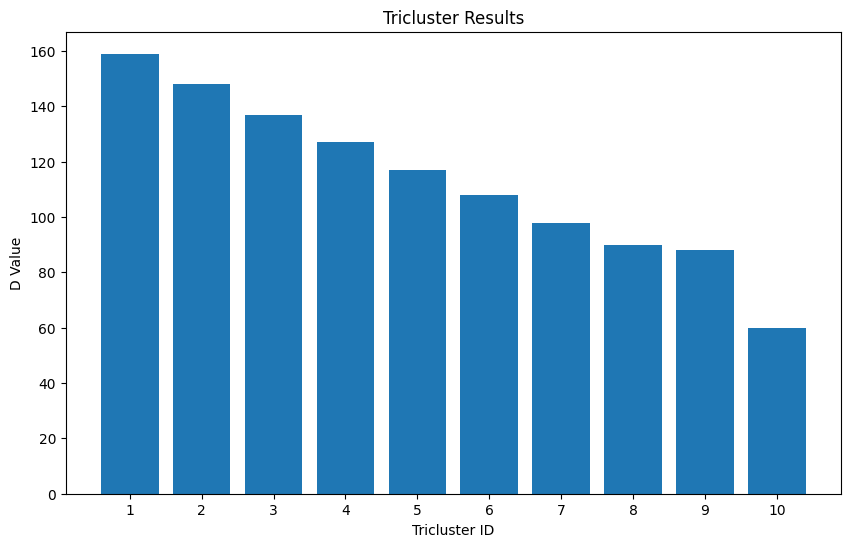

In [ ]:
import matplotlib.pyplot as plt



# Extract tricluster IDs and D values
ids = [tricluster["ID"] for tricluster in triclusters]
d_values = [tricluster["D"] for tricluster in triclusters]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(ids, d_values)
plt.xlabel("Tricluster ID")
plt.ylabel("D Value")
plt.title("Tricluster Results")
plt.xticks(ids)
plt.show()


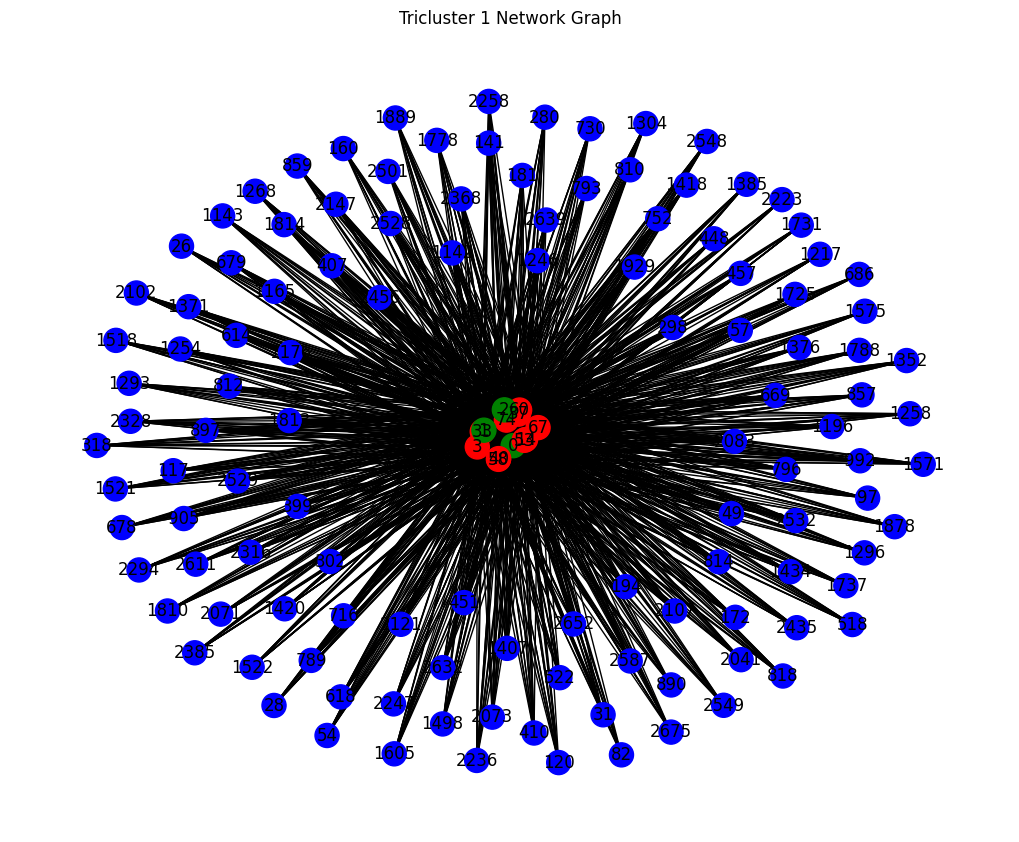

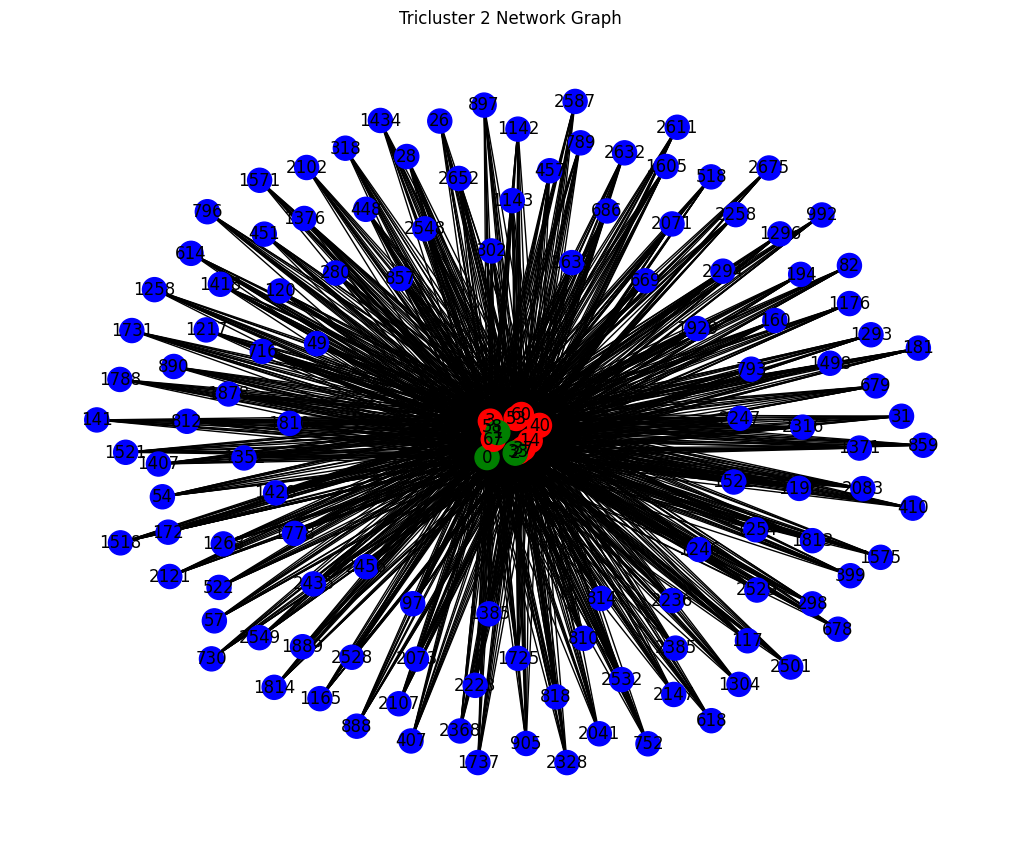

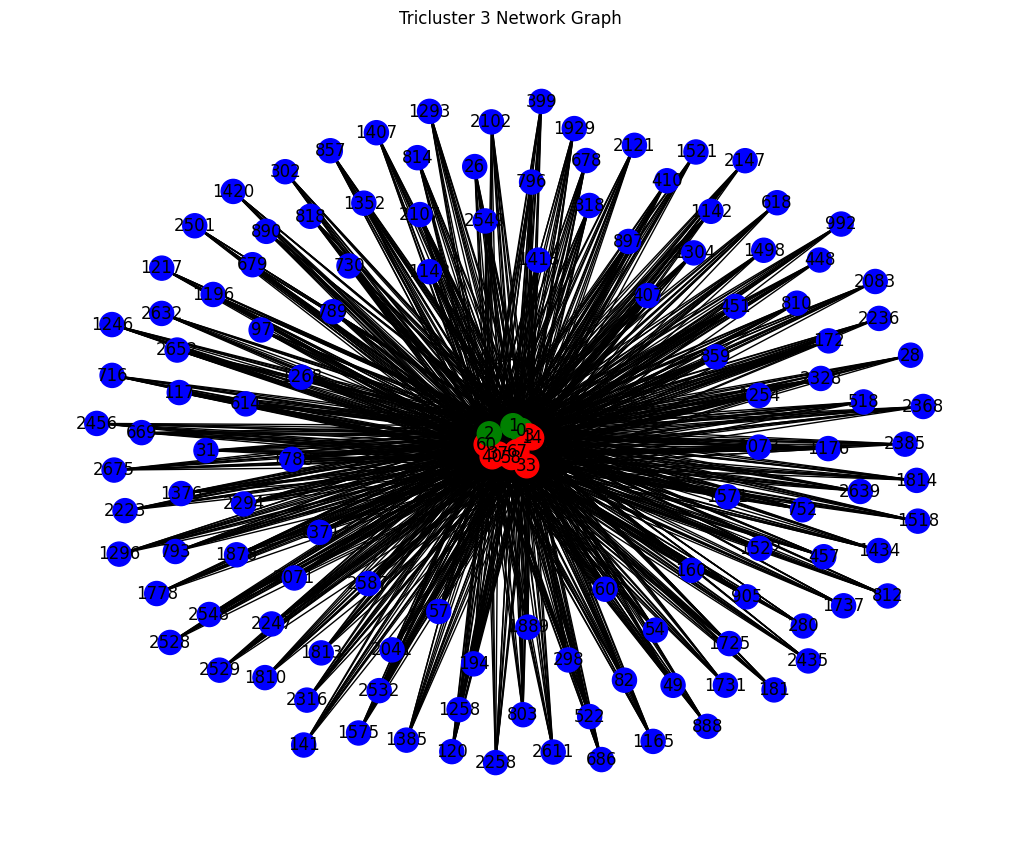

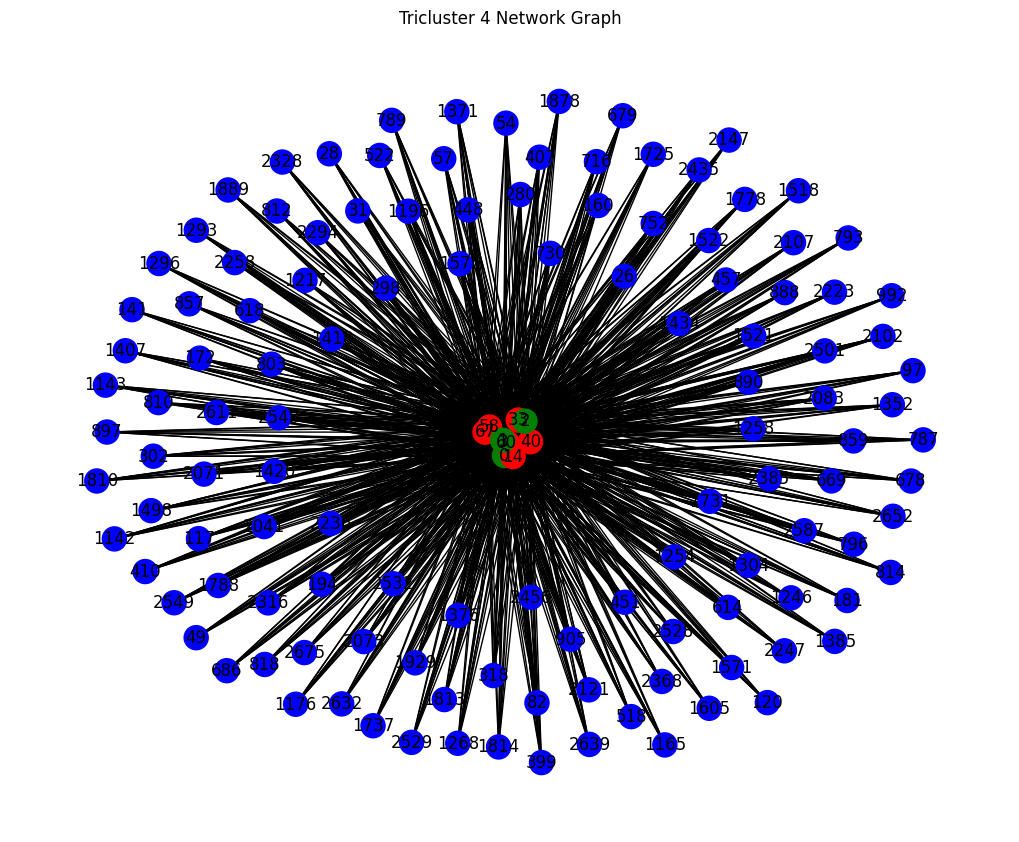

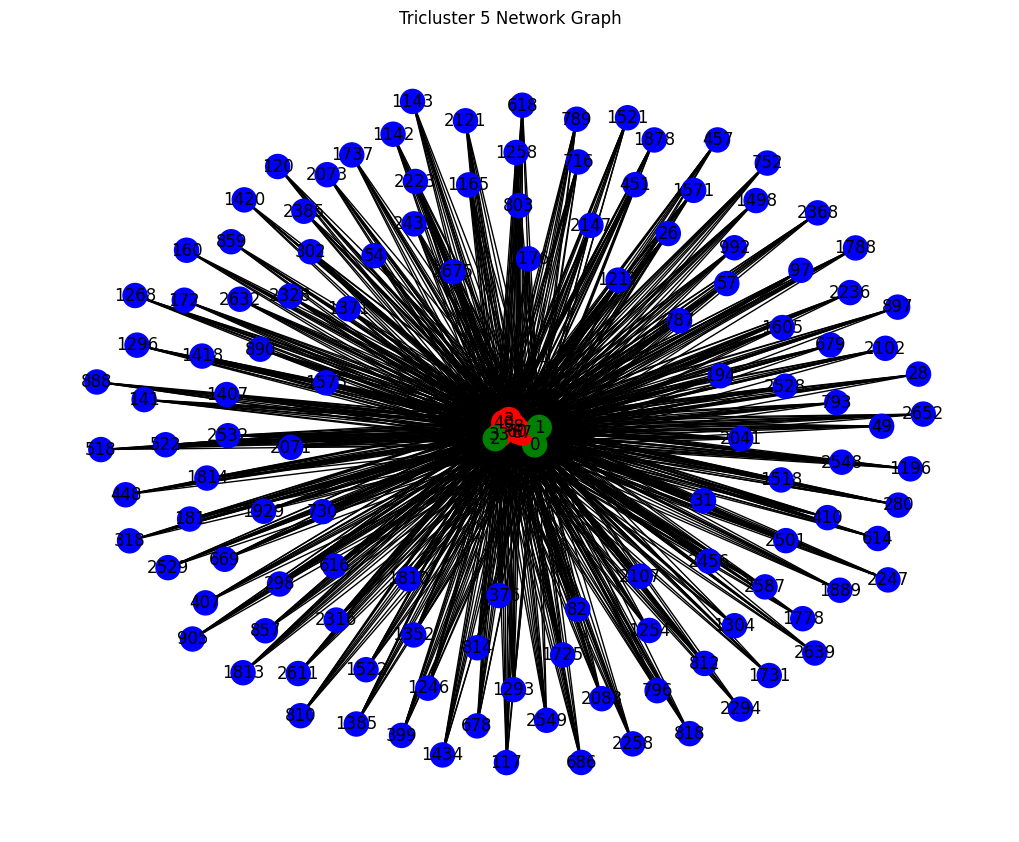

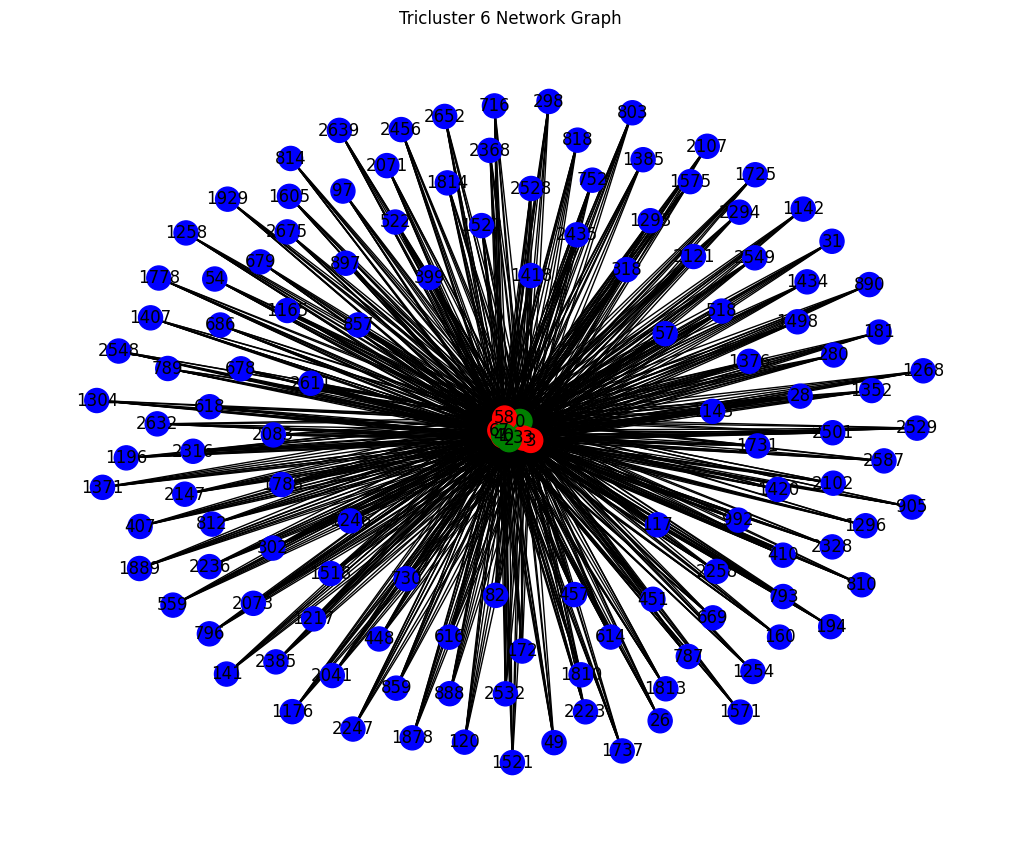

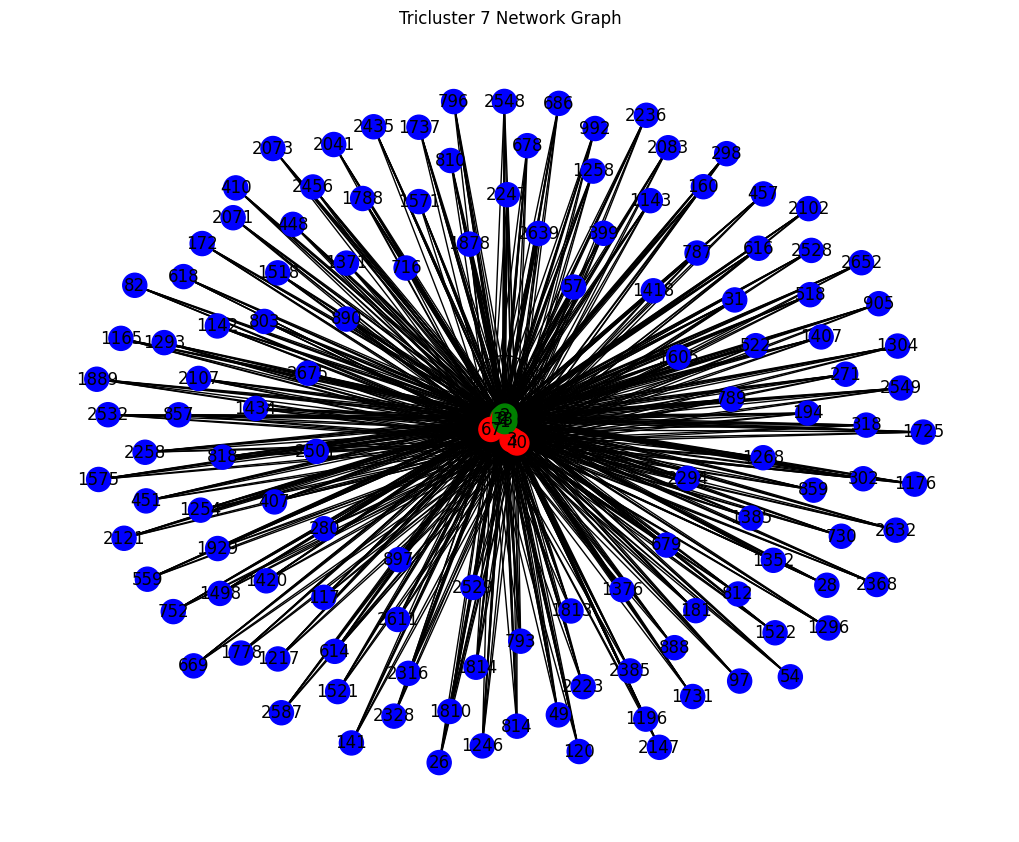

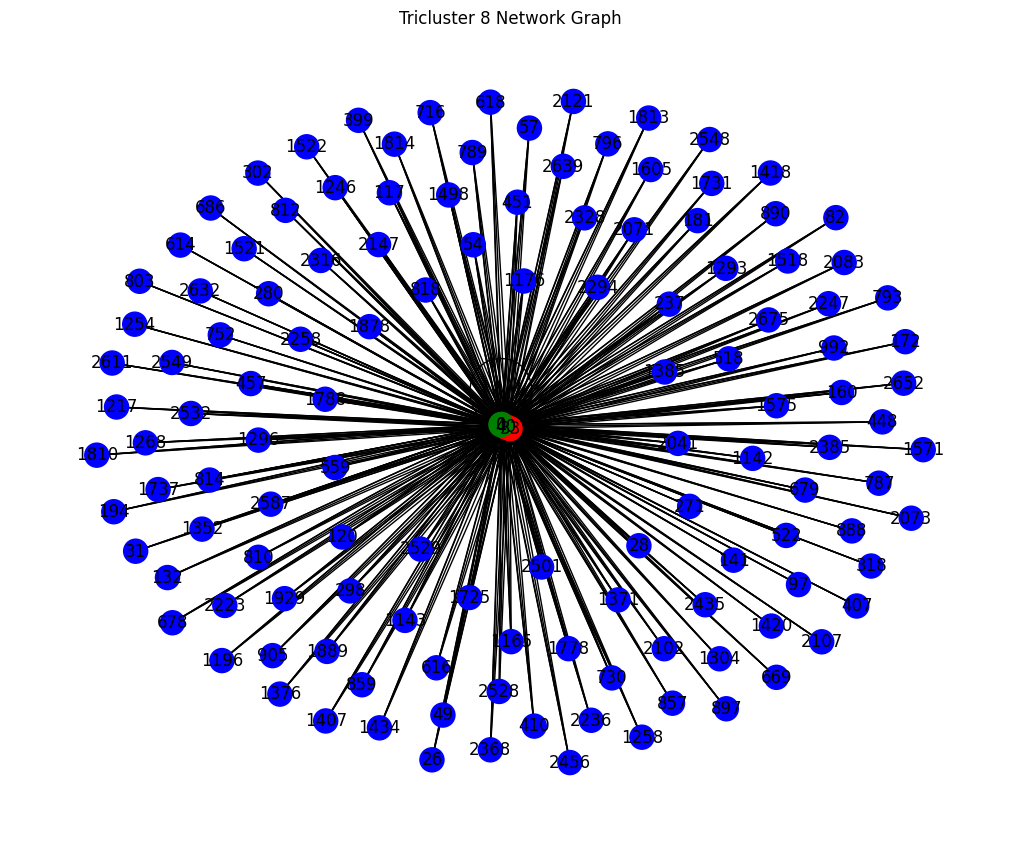

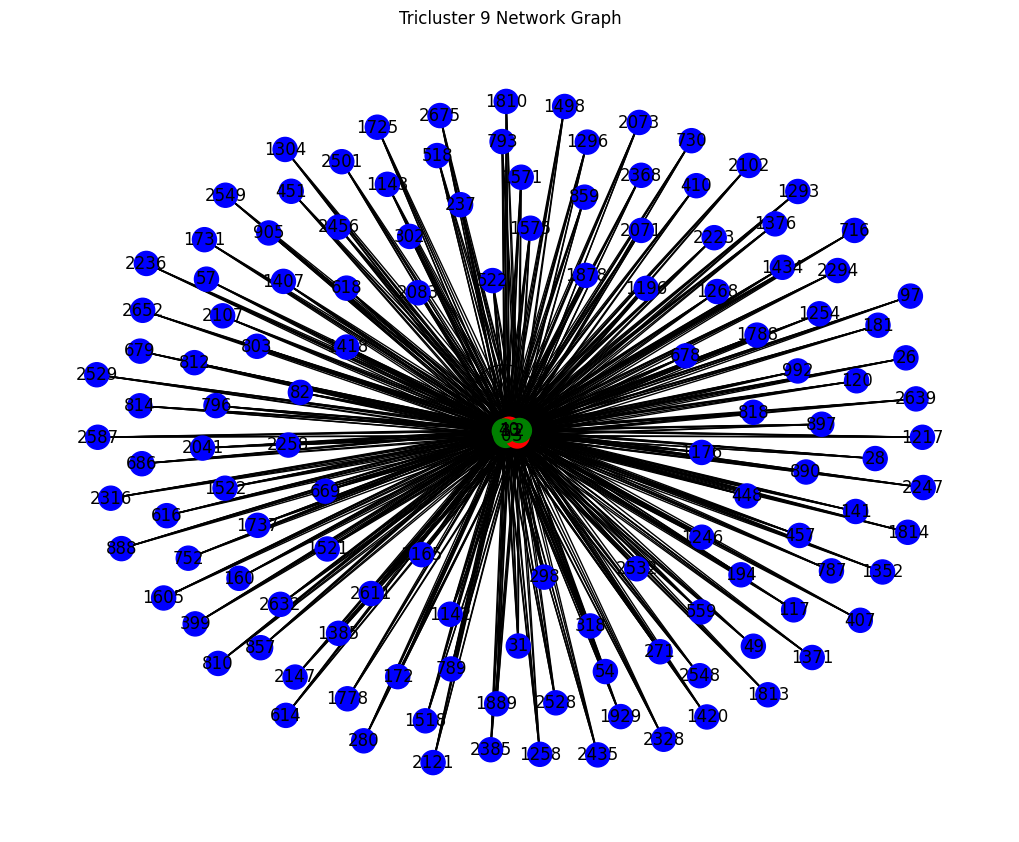

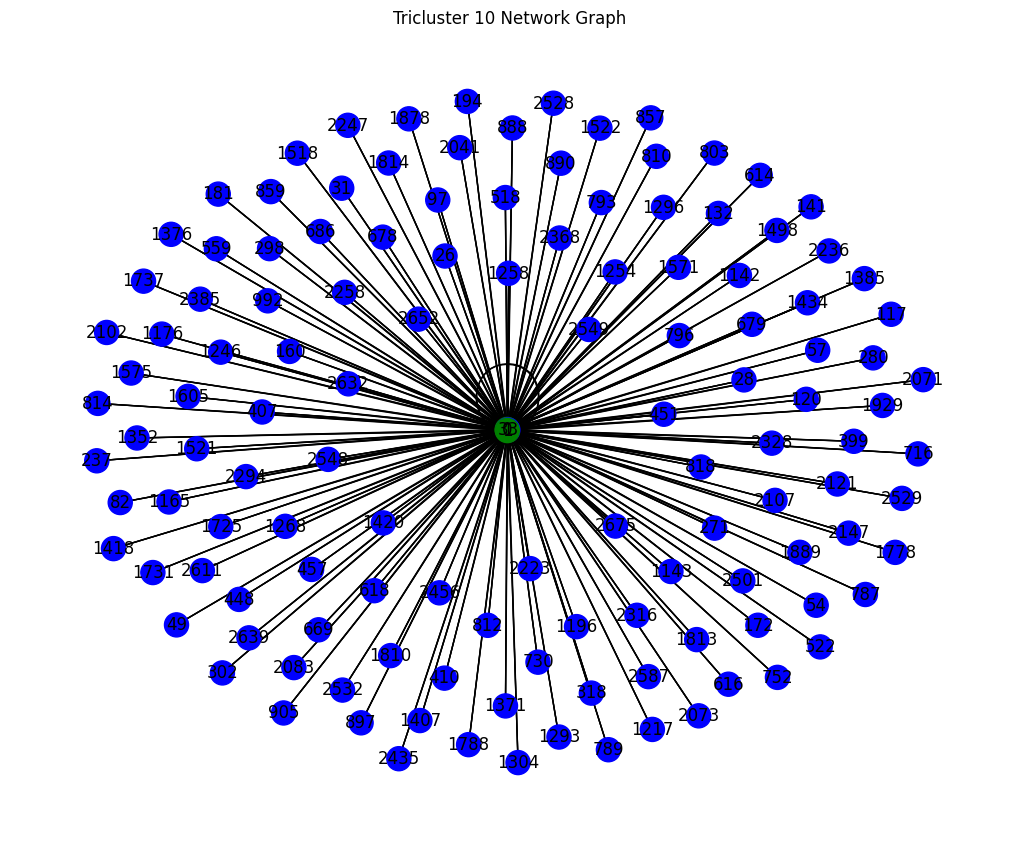

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx


# Create network graphs for each tricluster
for tricluster in triclusters:
    G = nx.Graph()

    # Add nodes and edges to the graph
    for v in tricluster["V"]:
        G.add_node(v, node_type="V")
    for w in tricluster["W"]:
        G.add_node(w, node_type="W")
    for u in tricluster["U"]:
        G.add_node(u, node_type="U")

    #Connect nodes in V to nodes in W
    for v in tricluster["V"]:
        for w in tricluster["W"]:
            G.add_edge(v, w)

    # Connect nodes in W to in U
    for w in tricluster["W"]:
        for u in tricluster["U"]:
            G.add_edge(w, u)

    # Draw the network graph
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=["red" if node_type == "V" else "blue" if node_type == "W" else "green" for _, node_type in nx.get_node_attributes(G, "node_type").items()])
    plt.title(f"Tricluster {tricluster['ID']} Network Graph")
    plt.show()


In [ ]:
import plotly.graph_objs as go
import plotly.express as px



# Create 3D scatter plot for each tricluster
for tricluster in triclusters:
    fig = go.Figure()

    # Add V, W, and U points to the scatter plot
    fig.add_trace(go.Scatter3d(x=list(tricluster["V"]), y=list(tricluster["W"]), z=list(tricluster["U"]), mode='markers', marker=dict(size=6, color='red', symbol='circle'), name='V'))
    fig.add_trace(go.Scatter3d(x=list(tricluster["W"]), y=list(tricluster["U"]), z=list(tricluster["V"]), mode='markers', marker=dict(size=6, color='blue', symbol='circle'), name='W'))
    fig.add_trace(go.Scatter3d(x=list(tricluster["U"]), y=list(tricluster["V"]), z=list(tricluster["W"]), mode='markers', marker=dict(size=6, color='green', symbol='circle'), name='U'))

    # Customize the appearance of the scatter plot
    fig.update_layout(scene=dict(xaxis_title='V', yaxis_title='W', zaxis_title='U'), title=f"Tricluster {tricluster['ID']} 3D Scatter Plot")

    # Show the scatter plot
    fig.show()


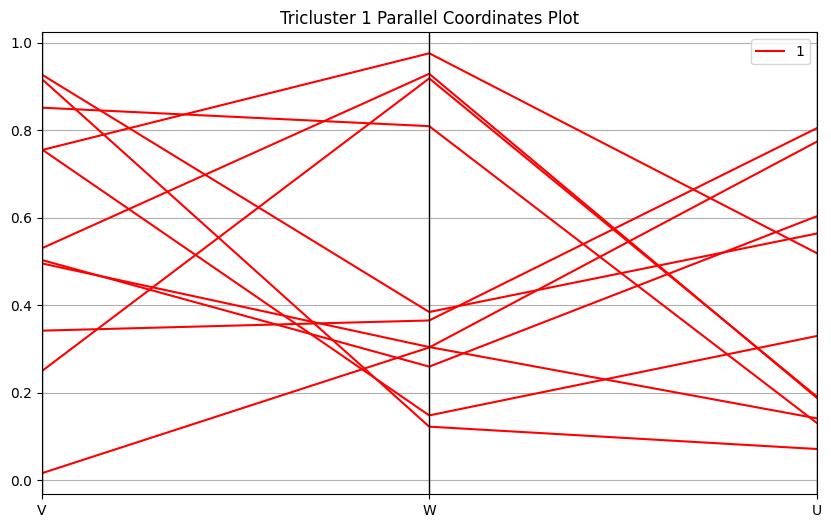

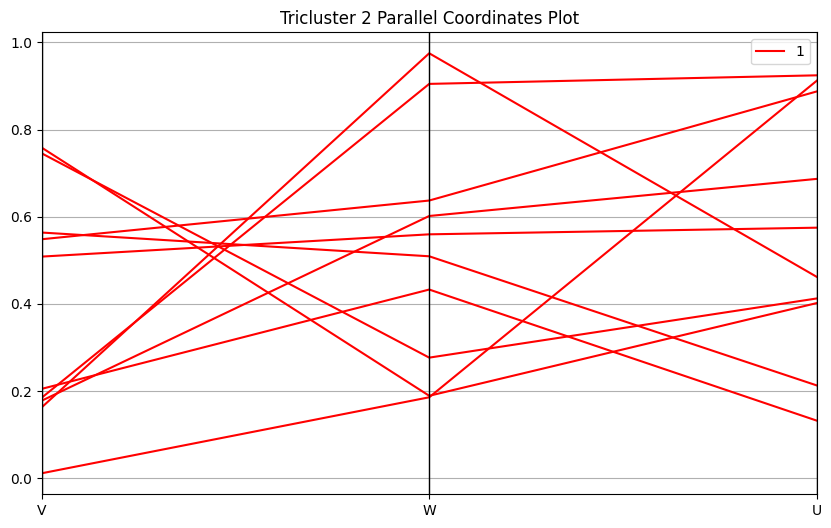

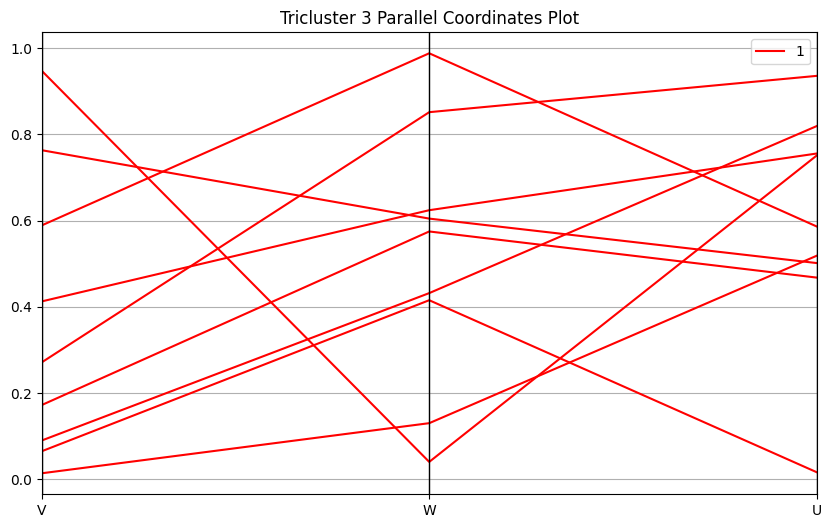

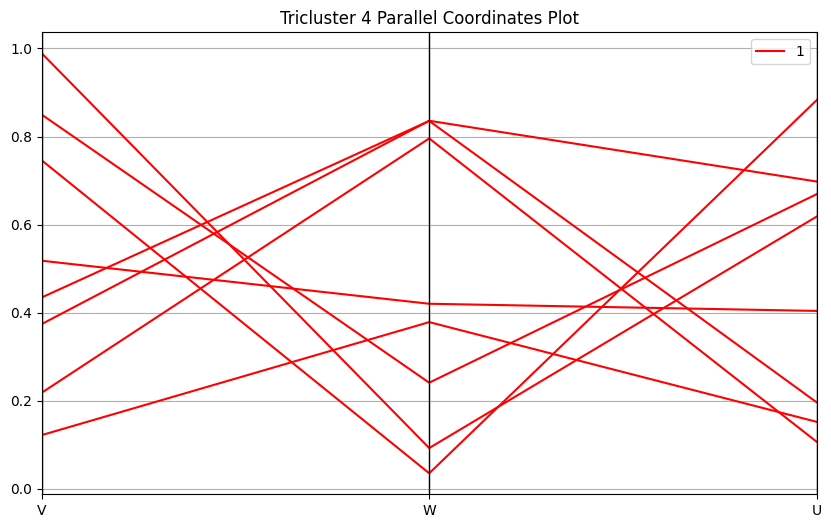

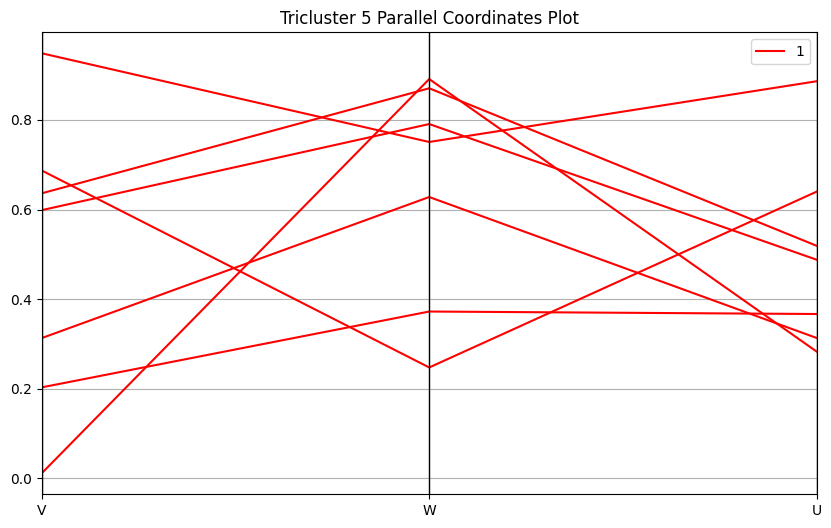

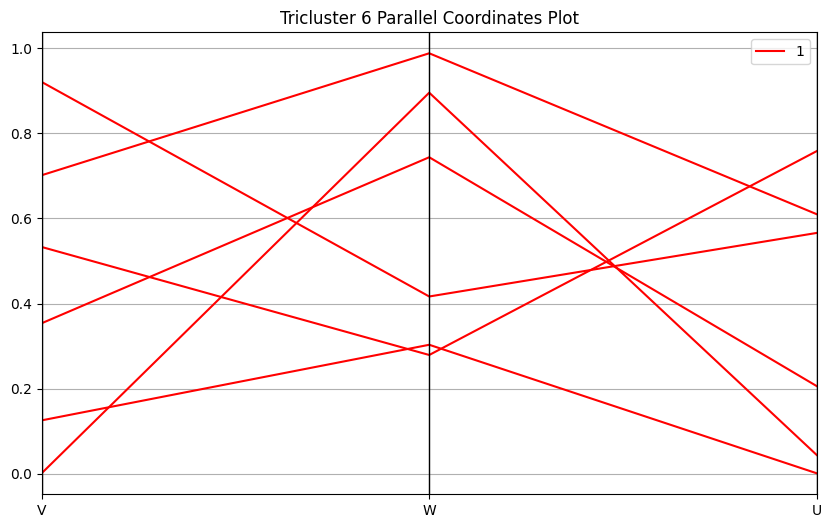

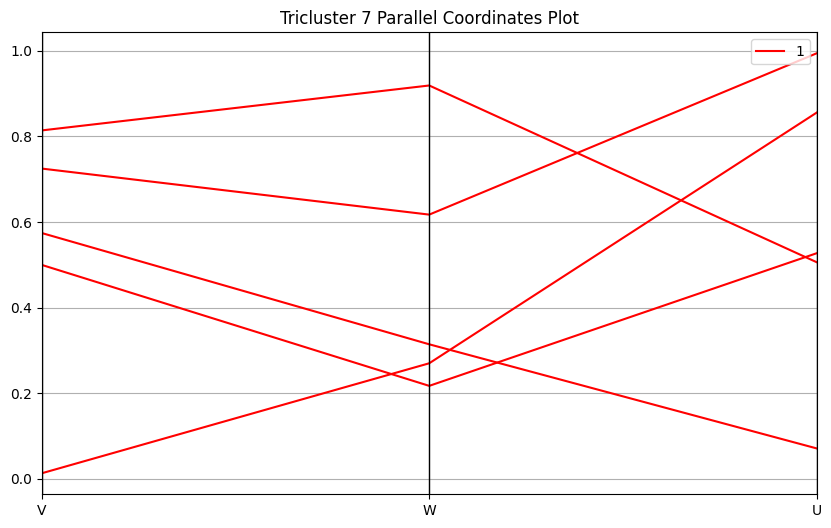

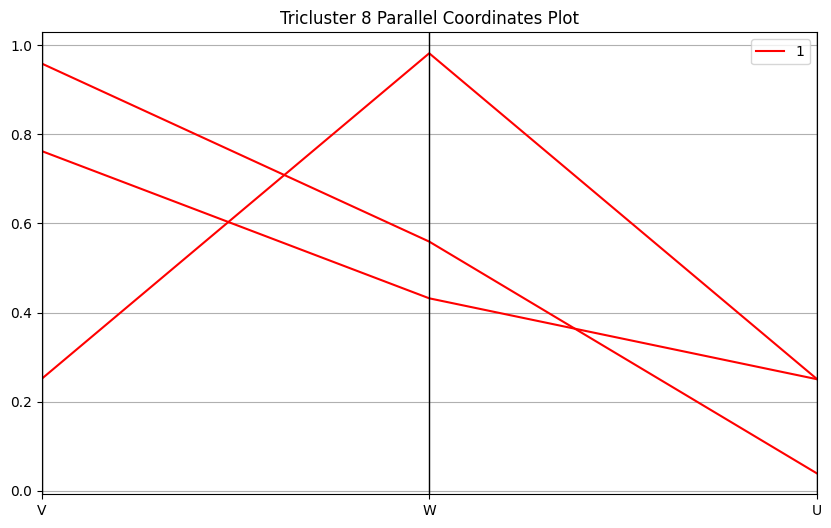

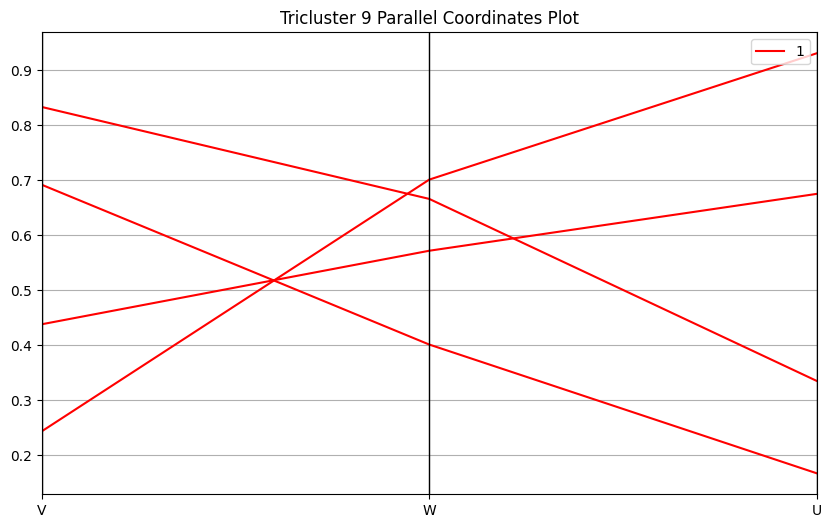

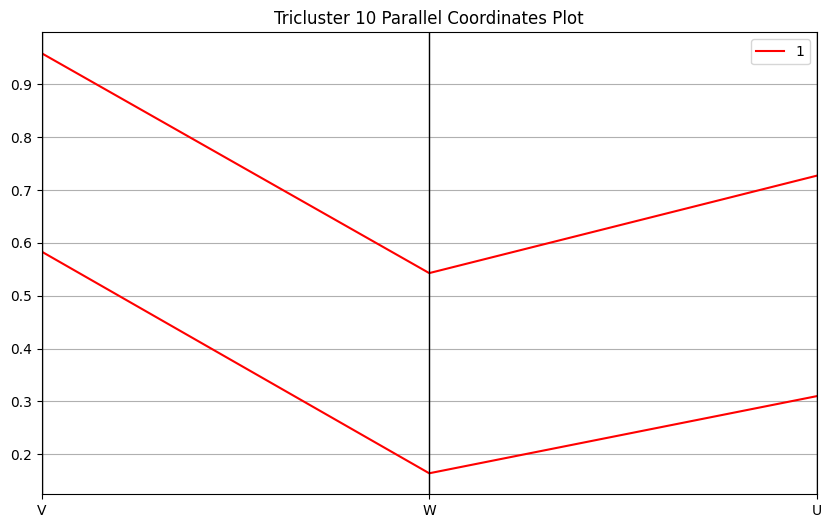

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Create a Parallel Coordinates Plot for each tricluster
for tricluster in triclusters:
    # Generate random data for the parallel coordinates plot (replace this with your actual data)
    data = pd.DataFrame(np.random.rand(len(tricluster["V"]), 3), columns=['V', 'W', 'U'])

    # Add a dummy class column
    data['dummy_class'] = 1

    # Create the parallel plot
    plt.figure(figsize=(10, 6))
    pd.plotting.parallel_coordinates(data, class_column='dummy_class', color=['red', 'blue', 'green'])
    plt.title(f"Tricluster {tricluster['ID']} Parallel Coordinates Plot")
    plt.show()


In [ ]:
import numpy as np

# Convert the index lists to NumPy arrays
Vv = np.array(list(tricluster["V"]))
Ww = np.array(list(tricluster["W"]))
Uu = np.array(list(tricluster["U"]))

# Create indexing arrays using np.ix_
V_indices, W_indices, U_indices = np.ix_(Vv, Ww, Uu)

# Extract the elements based on the indices
job_condition_elements = W[V_indices, W_indices, U_indices]
job_responsibility_elements = W[V_indices, W_indices, U_indices]
candidate_background_elements = W[V_indices, W_indices, U_indices]


In [ ]:
rows = []
cols = []
layers = []
j=0
for i in triclusters:
  if j==0 or j==4 or j==7:
    rows.append(list(i['V']))
    cols.append(list(i['W']))
    layers.append(list(i['U']))
  j+=1
  print(i['D'])
  print(i['V'])
  print(i['W'])
  print(i['U'])

159
{0, 33, 67, 3, 37, 40, 74, 14, 53, 58, 60}
{1, 518, 522, 2316, 1293, 1296, 1810, 1813, 1814, 2071, 789, 2073, 26, 2587, 28, 280, 793, 31, 1304, 2328, 796, 2083, 1571, 1575, 298, 810, 812, 302, 814, 49, 818, 2611, 2102, 54, 57, 2107, 318, 2368, 1605, 2632, 2121, 1352, 2639, 2385, 82, 1878, 857, 1371, 2652, 859, 1376, 97, 1889, 2147, 614, 1385, 618, 2675, 117, 1142, 1143, 120, 890, 1407, 897, 2435, 905, 1929, 1418, 1420, 141, 1165, 399, 407, 1176, 2456, 410, 1434, 669, 160, 678, 679, 172, 1196, 686, 2223, 181, 2236, 1725, 448, 1217, 194, 1731, 451, 2501, 2247, 1737, 457, 716, 2258, 730, 1498, 1246, 2528, 2529, 992, 2532, 1254, 1258, 1518, 752, 1521, 1778, 1522, 1268, 2548, 2294, 2549, 2041, 1788}
{0, 1, 2}
148
{0, 33, 67, 3, 37, 40, 14, 53, 58, 60}
{1, 518, 522, 2316, 1293, 1296, 1810, 1813, 1814, 2071, 789, 2073, 26, 2587, 28, 280, 793, 31, 1304, 2328, 796, 2083, 1571, 1575, 298, 810, 812, 302, 814, 49, 818, 2611, 2102, 54, 57, 2107, 318, 2368, 1605, 2632, 2121, 1352, 2639, 2385, 82

In [ ]:
layers

[[0, 1, 2], [0, 1, 2], [0, 1]]

In [ ]:
"""job_conds = get_relevance_matrix(job_desc, job_conditions)
job_respsn = get_relevance_matrix(job_desc, job_resp)
cand_bd = get_relevance_matrix(job_desc, cand_background)"""

##Finding the phrases obtained in the clusters

In [ ]:
import numpy as np

def find_text_and_string(value, relevance_matrix, texts, strings):
    for i in range(relevance_matrix.shape[0]):
        for j in range(relevance_matrix.shape[1]):
            if np.isclose(relevance_matrix[i][j], value):
                return texts[j], strings[i]


relevance_matrix = job_conds
texts,strings = job_desc, job_conditions
# Test with a sample value from the relevance matrix
row_index = 67
col_index = 2672
value = relevance_matrix[row_index][col_index]
text, string = find_text_and_string(value, relevance_matrix, texts, strings)

print("Text:", text)
print("--------------------------------------------------------------------------")

print("String:", string)
print("String:", value)


Text: Requisition ID: 234698
Work Area: Software-Development Operations
Expected Travel: 0 - 10%
Career Status: Professional
Employment Type: Regular Full Time

COMPANY DESCRIPTION

SAP started in 1972 as a team of five colleagues with a desire to do something new. Together, they changed enterprise software and reinvented how business was done. Today, as a market leader in enterprise application software, we remain true to our roots. That’s why we engineer solutions to fuel innovation, foster equality and spread opportunity for our employees and customers across borders and cultures.
SAP values the entrepreneurial spirit, fostering creativity and building lasting relationships with our employees. We know that a diverse and inclusive workforce keeps us competitive and provides opportunities for all. We believe that together we can transform industries, grow economics, lift up societies and sustain our environment. Because it’s the best-run businesses that make the world run better and i

In [ ]:
results = [[] for _ in range(len(layers))]  # List to store the results for each layer

for i in range(len(rows)):
    row_results = []  # Results for the current row

    for j, layer in enumerate(layers[i]):
        relevance_matrix = None
        texts, strings = None, None

        if layer == 0:
            relevance_matrix = np.array(job_conds)
            texts, strings = job_desc, job_conditions

        elif layer == 1:
            relevance_matrix = np.array(job_respsn)
            texts, strings = job_desc, job_resp

        else:
            relevance_matrix = np.array(cand_bd)
            texts, strings = job_desc, cand_background

        # Create a list to store the results for the current row and all columns
        row_column_results = []

        for k in rows[i]:
            column_results = []  # Results for the current column

            for l in cols[i]:
                value = relevance_matrix[k][l]

                if value != 0:
                    text, string = find_text_and_string(value, relevance_matrix, texts, strings)
                    column_results.append((value, text, string))  # Store the result for each calculation

            row_column_results.append(column_results)  # Store the results for the current column

        row_results.append(row_column_results)  # Store the results for the current row
        results[j].append(row_results)  # Store the results in the corresponding list of the current layer


In [ ]:
res1 = []
for j in results[1]:
  for sublist2 in j:
        for sublist3 in sublist2:
            for element in sublist3:
                print(element[0], element[2])
                res1.append((element[0], element[2]))
            print("-----")

0.06556202 a/b testing
1.2868153e-06 a/b testing
0.054623626 a/b testing
0.13365278 a/b testing
9.410996e-06 a/b testing
5.2039813e-06 a/b testing
6.4923515e-06 a/b testing
8.397686e-06 a/b testing
0.050779864 a/b testing
0.065318525 a/b testing
0.07144438 a/b testing
4.3784617e-06 a/b testing
1.1960999e-05 a/b testing
0.05178133 a/b testing
2.2208565e-05 a/b testing
0.05236148 a/b testing
0.050785378 a/b testing
8.397706e-06 a/b testing
8.116809e-06 a/b testing
4.348665e-06 a/b testing
6.2564636e-06 a/b testing
0.12557504 a/b testing
8.017883e-06 a/b testing
7.966589e-06 a/b testing
6.2961903e-06 a/b testing
0.06509513 a/b testing
0.050832145 a/b testing
1.0707116e-05 a/b testing
0.15712816 a/b testing
0.02723342 a/b testing
0.09004685 a/b testing
1.3712706e-05 a/b testing
0.14362368 a/b testing
4.9815244e-06 a/b testing
6.2338727e-06 a/b testing
6.776762e-06 a/b testing
1.4529974e-05 a/b testing
0.057159584 a/b testing
0.064748846 a/b testing
1.4169967e-05 a/b testing
0.015350687 a/b

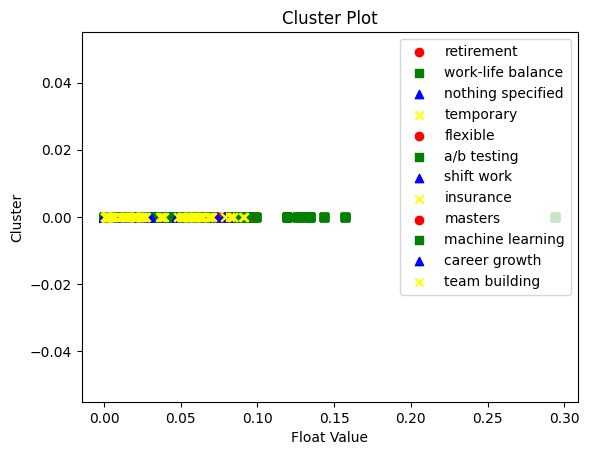

In [ ]:
import matplotlib.pyplot as plt


data = res1
# Separate the float values and string values into separate lists
float_values = [point[0] for point in data]
string_values = [point[1] for point in data]

# Get unique string values and assign a color or marker to each unique value
unique_strings = list(set(string_values))
colors = ['red', 'green', 'blue', 'yellow']
markers = ['o', 's', '^', 'x']

# Plot the points with different colors/markers based on the string values
for i, string in enumerate(unique_strings):
    x_values = [float_values[j] for j in range(len(data)) if string_values[j] == string]
    y_values = [0 for _ in range(len(x_values))]
    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]  # Cycle through markers
    plt.scatter(x_values, y_values, color=color, marker=marker, label=string)

plt.xlabel('Float Value')
plt.ylabel('Cluster')
plt.title('Cluster Plot')
plt.legend()
plt.show()


In [ ]:
import plotly.graph_objects as go

data = res1
# Separate the float values and string values into separate lists
float_values = [point[0] for point in data]
string_values = [point[1] for point in data]

# Get unique string values and assign a color to each unique value
unique_strings = list(set(string_values))
colors = ['red', 'green', 'blue', 'yellow']
colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)',
          'rgb(148, 103, 189)', 'rgb(140, 86, 75)', 'rgb(227, 119, 194)', 'rgb(127, 127, 127)',
          'rgb(188, 189, 34)', 'rgb(23, 190, 207)', 'rgb(174, 199, 232)', 'rgb(255, 187, 120)']

markers = ['circle', 'square', 'diamond', 'cross', 'x', 'triangle-up', 'triangle-down',
           'triangle-left', 'triangle-right', 'pentagon', 'star', 'hexagon']

# Create the 3D scatter plot
fig = go.Figure(data=go.Scatter3d(
    x=float_values,
    y=[0] * len(data),
    z=[0] * len(data),
    mode='markers',
    marker=dict(
        size=5,
        color=[colors[unique_strings.index(s) % len(colors)] for s in string_values],
        opacity=0.8
    )
))

# Set plot title and axis labels
fig.update_layout(
    title='3D Scatter Plot',
    scene=dict(
        xaxis_title='Float Value',
        yaxis_title='Cluster',
        zaxis_title=''
    )
)

fig.show()


In [ ]:
import plotly.graph_objects as go

data = res0

# Separate the float values and string values into separate lists
float_values = [point[0] for point in data]
string_values = [point[1] for point in data]


unique_strings = list(set(string_values))
colors = ['red', 'green', 'blue', 'yellow']  # Example colors, you can customize as needed

# Create the 3D scatter plot
fig = go.Figure(data=go.Scatter3d(
    x=float_values,
    y=[0] * len(data),
    z=[0] * len(data),
    mode='markers',
    marker=dict(
        size=5,
        color=[colors[unique_strings.index(s) % len(colors)] for s in string_values],
        opacity=0.8
    )
))

# Set plot title and axis labels
fig.update_layout(
    title='3D Scatter Plot',
    scene=dict(
        xaxis_title='Float Value',
        yaxis_title='Cluster',
        zaxis_title=''  # Set z-axis title as needed
    )
)

fig.show()


In [ ]:
res0= []
for i in results[0]:
  for sublist2 in i:
        for sublist3 in sublist2:
            for element in sublist3:
                print(element[0], element[2])
                res0.append((element[0], element[2]))
            print("-----")


0.06556202 a/b testing
1.2868153e-06 a/b testing
0.054623626 a/b testing
0.13365278 a/b testing
9.410996e-06 a/b testing
5.2039813e-06 a/b testing
6.4923515e-06 a/b testing
8.397686e-06 a/b testing
0.050779864 a/b testing
0.065318525 a/b testing
0.07144438 a/b testing
4.3784617e-06 a/b testing
1.1960999e-05 a/b testing
0.05178133 a/b testing
2.2208565e-05 a/b testing
0.05236148 a/b testing
0.050785378 a/b testing
8.397706e-06 a/b testing
8.116809e-06 a/b testing
4.348665e-06 a/b testing
6.2564636e-06 a/b testing
0.12557504 a/b testing
8.017883e-06 a/b testing
7.966589e-06 a/b testing
6.2961903e-06 a/b testing
0.06509513 a/b testing
0.050832145 a/b testing
1.0707116e-05 a/b testing
0.15712816 a/b testing
0.02723342 a/b testing
0.09004685 a/b testing
1.3712706e-05 a/b testing
0.14362368 a/b testing
4.9815244e-06 a/b testing
6.2338727e-06 a/b testing
6.776762e-06 a/b testing
1.4529974e-05 a/b testing
0.057159584 a/b testing
0.064748846 a/b testing
1.4169967e-05 a/b testing
0.015350687 a/b

In [ ]:
for i in results[2]:
  for sublist2 in i:
        for sublist3 in sublist2:
            for element in sublist3:
                print(element[0], element[2])
            print("-----")

0.06556202 a/b testing
1.2868153e-06 a/b testing
0.054623626 a/b testing
0.13365278 a/b testing
9.410996e-06 a/b testing
5.2039813e-06 a/b testing
6.4923515e-06 a/b testing
8.397686e-06 a/b testing
0.050779864 a/b testing
0.065318525 a/b testing
0.07144438 a/b testing
4.3784617e-06 a/b testing
1.1960999e-05 a/b testing
0.05178133 a/b testing
2.2208565e-05 a/b testing
0.05236148 a/b testing
0.050785378 a/b testing
8.397706e-06 a/b testing
8.116809e-06 a/b testing
4.348665e-06 a/b testing
6.2564636e-06 a/b testing
0.12557504 a/b testing
8.017883e-06 a/b testing
7.966589e-06 a/b testing
6.2961903e-06 a/b testing
0.06509513 a/b testing
0.050832145 a/b testing
1.0707116e-05 a/b testing
0.15712816 a/b testing
0.02723342 a/b testing
0.09004685 a/b testing
1.3712706e-05 a/b testing
0.14362368 a/b testing
4.9815244e-06 a/b testing
6.2338727e-06 a/b testing
6.776762e-06 a/b testing
1.4529974e-05 a/b testing
0.057159584 a/b testing
0.064748846 a/b testing
1.4169967e-05 a/b testing
0.015350687 a/b

In [ ]:
my_list = [[[[(1, 2, 3), (4, 5, 6), (7, 8, 9), (10, 11, 12)]]]]

# Iterate over the outer lists
for sublist1 in my_list:
    for sublist2 in sublist1:
        for sublist3 in sublist2:
            for element in sublist3:
                print(element)


(1, 2, 3)
(4, 5, 6)
(7, 8, 9)
(10, 11, 12)


In [ ]:
for i in results[0][0][0][1]:
  print(i[2])

a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b testing
a/b 

In [ ]:
#Testing on
import numpy as np

def find_text_and_string(value, relevance_matrix, texts, strings):
    for i in range(relevance_matrix.shape[0]):
        for j in range(relevance_matrix.shape[1]):
            if np.isclose(relevance_matrix[i][j], value):
                return texts[j], strings[i]


relevance_matrix = cand_bd
texts,strings = job_desc, cand_background
# Test with a sample value from the relevance matrix
row_index = 74
col_index = 1814
value = relevance_matrix[row_index][col_index]
text, string = find_text_and_string(value, relevance_matrix, texts, strings)

print("Text:", text)
print("--------------------------------------------------------------------------")

print("String:", string)
print("String:", value)

Text: Zumper is on a mission to revolutionize the rental industry by making renting an apartment as easy as booking a hotel. With millions of users every month, we've generated support from top-tier investors and have raised $90 million to date. To help us bring our vision to life, we're searching for bright, passionate, and hard-working people to join our rapidly-growing team and build extraordinary products.
We are looking for a Sr. Data Scientist to analyze large amounts of raw information to find patterns that will help improve the apartment rental experience. We will rely on you to extract valuable business insights and help apply them to product and process. In this role, you will have the opportunity to shape the Data Science team and guide how data products are built for the entire organization. We also want to see a passion for machine learning, research, and mentorship of junior data scientists.

What You'll Be Doing
Collaborate with engineering and product development teams
